# word2vec with spacy, Spanish, gensim and Aphorisms

In [1]:
# !python -m spacy download es_core_news_sm

# import modules & set up logging
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [0]:
import spacy
from spacy.lang.es.examples import sentences 

In [4]:
nlp = spacy.load('es_core_web_sm')
doc = nlp(sentences[0])

OSError: ignored

In [0]:
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.lemma_)

El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.
El DET det El
que PRON nsubj que
asiste VERB ROOT asistir
al ADP case al
cinematógrafo NOUN obl cinematógrafo
quisiera VERB amod querer
que SCONJ mark que
todo DET det todo
el DET det el
público NOUN obl público
que PRON nsubj que
llena VERB acl lleno
la DET det lo
sala NOUN obj salar
, PUNCT punct ,
desde ADP case desde
su DET det su
fila NOUN obl fila
a ADP case a
la DET det lo
pantalla NOUN nmod pantalla
, PUNCT punct ,
careciese NOUN appos carecer
de ADP case de
cabeza NOUN nmod cabeza
. PUNCT punct .
Necesita VERB ROOT Necesita
el DET det el
calor NOUN obj calor
humano ADJ amod humanar
de ADP case de
los DET det lo
demás PRON nmod demás
para ADP 

In [0]:
doc3s = nlp(u"Esta es una      frase.          Y esta es otra frase.  [[Pero, est es la ultima frase]].")
for sent in doc3s.sents:
    print(sent.text)

Esta es una      frase.          
Y esta es otra frase.  
[[Pero, est es la ultima frase]].


In [0]:
!pwd

/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga


In [0]:
file_aphor_labels = "/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorism-label.txt"
file_aphor_nolabels = "/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorism-nolabel.txt"

fh = open(file_aphor_labels, encoding='utf-8')
aphor_label_raw = fh.read()
fh.close
type(aphor_label_raw)
len(aphor_label_raw)
print(aphor_label_raw[1:500])

print("===================")

fh = open(file_aphor_nolabels, encoding='utf-8')
aphor_nolabel_raw = fh.read()
fh.close
type(aphor_nolabel_raw)
len(aphor_nolabel_raw)
print(aphor_nolabel_raw[1:500])



l que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello. [[personalidades, molestia, corpóreo, cabeza, humano, cine]]








El hipopótamo parece un buzón de alcance en espera de cartas. ¿Cartas para el África? ¿Car
as cintas de las gorras de los marinos van diciendo adiós a


todos los mares.








Cuando la mujer se pone una media en la mano para ver si


tiene un punto saltado, su brazo toma perversión de pierna.








La gota de lacre que cae fuera de sitio es una verruga de la


carta.








Las plumas estilográficas son desobedientes como niños que


no saben o no quieren escribir.








El rayo es una especie de sacacorchos encolerizado.








Lo más maravilloso de la prestidigitación case


In [0]:
import pandas as pd
import re
import string

# Integer weights given to tags words (0 = remove)
TAG_WT = 0
# If missing tags completely, this hold the sequential number of aphorism as linearly processed (neg = no missing tags)
tag_miss = -1

exclude_punct = set(string.punctuation)

In [0]:
aphor_wtags = [] # List of all tags associated with current aphorism
aphor_no = 0 # Current number of aphorism being processed

# FUTURE: to store in pandas df for greater functionality (e.g. graphing/EDA)
data = pd.DataFrame(columns = ['aphor', 'tags'])

def remove_dup_spaces(l):
  words = [w for w in l.split('\n') if w != '']
  return ' '.join(words)

def striplist(l):
    return([x.strip() for x in l])

# aphor_nolable_raw

# Process labelled aphorisms

aphor_tags_str = aphor_label_raw.split("]]") # Split each line into 'aphorism' and 'tags'

aphor_both = []
line_no = 0

for line in aphor_tags_str:
    line_no += 1
    line_both = line.split("[[")
    aphor = line_both[0].strip()
    try:
        line_both[1]
        tags = line_both[1].strip()
    except IndexError:
        tags = ''
        
    aphor = remove_dup_spaces(aphor)
    
    # Process Aphorism string
    line_sp = "".join([re.sub(" +"," ",x) for x in line]) # Collapse spaces
    line_nl = "".join([re.sub("\n+","\n",x) for x in line_sp]) # Collapse new lines
    print("LINE {}: ---{}---".format(line_no, aphor))
    print("LINE {}: ---{}---".format(line_no, tags))
    
    # Old
    # aphor0 = remove_dup_spaces(new[0])
    # aphor1 = [''.join(ch for ch in w if ch not in exclude_punct) for w in aphor0.split(' ') if len(w) > 0]
  
    # Process tag string
    if len(tags) < 2:
        print("ERROR: no tags for aphorism #{}: text: {}".format(line_no, tags))
        # tags = []
        aphor_both = aphor
    else:
        tags_ws = tags.split(",")
        # print(type(tags))
        tags = [tag_word.strip() for tag_word in tags_ws]
        # striplist(tags)
        
    aphor_both = aphor + (TAG_WT * str(tags))
    
    # Add each processed line to the cumulative list of aphorisms with tags
    if (len(aphor) > 1):
        aphor_wtags.append(aphor_both)

print(len(aphor_wtags))

LINE 1: ---El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.---
LINE 1: ---personalidades, molestia, corpóreo, cabeza, humano, cine---
LINE 2: ---El hipopótamo parece un buzón de alcance en espera de cartas. ¿Cartas para el África? ¿Cartas para la región de los Lagos Centrales? Arca postal para en medio de los desiertos caliginosos hubiéramos arrojado en su boquete una misiva cualquiera si tuviésemos amigos en aquéllas regiones inhóspitas. ¡Con qué hambre de cartas nos abre su boca en los parques zoológicos!---
LINE 2: ---naturaleza, animales, comparaciones, objetos, buzón, epístola, geografía---
LINE 3: ---Abunda ahora mucho ese tipo avaro de filos, que afila dos cuchillos, uno contra otro, como si 

LINE 517: ---El despertador nos está tejiendo siempre un gorro de dormir.---
LINE 517: ---objetos, personificación---
LINE 518: ---Los corderos nos llaman con sus balidos como si nos hubiesen tomado por sus papás.---
LINE 518: ---animales, paternidad---
LINE 519: ---Los pescadores arrastran las redes como su sombra colectiva.---
LINE 519: ---oficios, objetos---
LINE 520: ---En el fondo de los espejos hay un fotógrafo agazapado.---
LINE 520: ---objetos, oficios---
LINE 521: ---La tormenta morada trae tinta en sus nubes.---
LINE 521: ---paisajes, cielo, metáfora, recursos-literarios---
LINE 522: ---El corazón es como un organista que necesita que le estén enviando un soplo los fuelles de los pulmones.---
LINE 522: ---corpóreo, oficios, comparaciones, intrumentos musicales, música---
LINE 523: ---Los paracaidistas llevan sus mochilas como colegiales del aire.---
LINE 523: ---oficios, comparaciones---
LINE 524: ---El escritor quiere escribir su mentira y escribe su verdad.---
LINE 524: ---

LINE 866: ---La serenidad es la más bella corbata del hombre.---
LINE 866: ---personalidad, sereno, compraciones, ropa, hombre---
LINE 867: ---No es que fuese persuasivo, es que tenía una gran facilidad para mover las cejas.---
LINE 867: ---corpóreo, expresiones-faciales, personalidad, persuasivo---
LINE 868: ---Cuando la que luce dos rodetes los lleva muy pequeños, parece que lleva en la nuca un par de pastas para el té de la sonsería.---
LINE 868: ---mujer, cabello, estético, personalidad, despreocupado---
LINE 869: ---En la cebra se ha amansado y se ha vuelto caballo el tigre.---
LINE 869: ---animales, comparaciones, corpóreo, personalidad, manso---
LINE 870: ---Bebiendo agua de las fuentes de los niños en los jardines se adquiere juvencia.---
LINE 870: ---bebidas, agua, fuentes, juventud---
LINE 871: ---Cuando al caballo se le hinchan mucho las narices gana la carrera.---
LINE 871: ---animales, negocios, carreras-de-caballos---
LINE 872: ---El alba es silenciosa, pero despierta la 

LINE 1221: ---La mirada del cordero hace caritativo al hombre.---
LINE 1221: ---sentimientos, misericordia, animales, cordero---
LINE 1222: ---«Pan» es palabra tan breve para que podamos pedirlo con urgencia.---
LINE 1222: ---habla, palabras, concisión---
LINE 1223: ---Unid todas las estrellas con líneas de lápiz luminoso y resultará la silueta de Dios.---
LINE 1223: ---astros, cielo, teología---
LINE 1224: ---Las berenjenas son como maduros badajos de campana.---
LINE 1224: ---frutas, berenjena, comparaciones, campanas---
LINE 1225: ---Al vino destapado se le va su esencia de bromista.---
LINE 1225: ---bebidas, alcohol, vino, humor---
LINE 1226: ---El dinero huele a vagabundo.---
LINE 1226: ---dinero, olores, comparaciones---
LINE 1227: ---Tenía cara de galleta de agua.---
LINE 1227: ---corpóreo, cara, comparaciones, comida, fealdad---
LINE 1228: ---Mojaba un sobre como si saborease una empanada.---
LINE 1228: ---placer, comida---
LINE 1229: ---El maitre es como el novio del restauran

LINE 1605: ---El sueño es un pequeño adelanto que nos hace la muerte para que nos sea más fácil pasar la vida.---
LINE 1605: ---sueño, comparaciones, remedios, vida, muerte---
LINE 1606: ---Las más profundas notas de la orquesta son las que produce a plena nariz.---
LINE 1606: ---música, intrumentos-musicales, corpóreo, nariz---
LINE 1607: ---El pasamanos de la escalera tiene siempre una galantería de caballero joven.---
LINE 1607: ---objetos, pasamanos, comparaciones, juventud, personalidad, galante---
LINE 1608: ---El cráneo es la bóveda del corazón.---
LINE 1608: ---corpóreo, comparaciones, cráneo, corazón, negocios, bóvedas---
LINE 1609: ---Hay cucharones pródigos y cucharones escatimadores.---
LINE 1609: ---objetos, cucharones, exceso, carencia, personificación---
LINE 1610: ---El cacahuete tiene algo atravesado en la garganta.---
LINE 1610: ---forma, fruto, corpóreo, garganta---
LINE 1611: ---Aparece lo práctico en la civilización cuando se inventa la herradura.---
LINE 1611: ---

In [0]:
print(aphor_wtags[0])
print("==========")
print(aphor_wtags[1718])

El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.
La casa de té está llena de los yes que estornudan los ingleses.


In [0]:
# Create Aphorism (+ Multiple*Tag Words) Vectors

doc = nlp(aphor_wtags[0])
for sent in doc.sents:
    print("SENT: " + sent.text)
    
for token in doc:
    print("TOKEN: " + token.text)

SENT: El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza.
SENT: Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.
TOKEN: El
TOKEN: que
TOKEN: asiste
TOKEN: al
TOKEN: cinematógrafo
TOKEN: quisiera
TOKEN: que
TOKEN: todo
TOKEN: el
TOKEN: público
TOKEN: que
TOKEN: llena
TOKEN: la
TOKEN: sala
TOKEN: ,
TOKEN: desde
TOKEN: su
TOKEN: fila
TOKEN: a
TOKEN: la
TOKEN: pantalla
TOKEN: ,
TOKEN: careciese
TOKEN: de
TOKEN: cabeza
TOKEN: .
TOKEN: Necesita
TOKEN: el
TOKEN: calor
TOKEN: humano
TOKEN: de
TOKEN: los
TOKEN: demás
TOKEN: para
TOKEN: completar
TOKEN: el
TOKEN: espectáculo
TOKEN: ,
TOKEN: porque
TOKEN: no
TOKEN: le
TOKEN: resultaría
TOKEN: una
TOKEN: sala
TOKEN: vacía
TOKEN: ,
TOKEN: pero
TOKEN: no
TOKEN: le
TOKEN: desagradaría
TOKEN: el
TOKEN: panorama
TOKE

In [0]:
sp_stop_set = spacy.lang.es.stop_words.STOP_WORDS
sp_stop_set.add('a')
# print("TYPE: " + str(type(sp_stop_str)))
# sp_stop_ls = list(set(sp_stop_str))
sp_stop_ls = list(sp_stop_str)


excl_punct_str = string.punctuation + '¿' + '¡'
excl_punct = list(set(excl_punct_str))

print(excl_punct)

['}', '$', '+', '`', '(', ';', '@', ']', '*', "'", '^', '_', '/', '<', '&', ',', '\\', '{', '¿', '%', '!', '|', '.', '~', '"', '[', '#', '¡', ':', ')', '=', '?', '>', '-']


In [0]:
print('Number of stop words: %d' % len(sp_stop_ls))
print('First 10 stop words: %s' % list(sp_stop_ls)[:10])
print('Excluded punctuation: %s' % excl_punct)

Number of stop words: 552
First 10 stop words: ['tenga', 'agregó', 'trata', 'ahí', 'mismos', 'nos', 'tan', 'lo', 'saben', 'cuantos']
Excluded punctuation: ['}', '$', '+', '`', '(', ';', '@', ']', '*', "'", '^', '_', '/', '<', '&', ',', '\\', '{', '¿', '%', '!', '|', '.', '~', '"', '[', '#', '¡', ':', ')', '=', '?', '>', '-']


In [0]:
# Remove common stopwords and tokenize and lemmatize
import string

aphor_clean = []
tr = str.maketrans("", "", excl_punct_str)

# aphor_clean = [[word for word in document.translate(tr).lower().split() if word not in sp_stop_ls]
#                  for document in aphor_wtags]

aphor_clean = []
for document in aphor_wtags:
    print()
    doc_clean = " ".join(document.translate(tr).lower().split()) # remove punct, lowercase
    doc_pos = nlp(doc_clean)
    aphor_line = []
    for token in doc_pos: # lemmatize
        token_text = token.text
        if token_text not in sp_stop_ls: # remove stopwords
            aphor_line.append(token_text)
            print("NOT STOPWORD: " + token_text)
        else:
            print("STOPWORD: " + token_text)
    aphor_clean.append(aphor_line)
        


STOPWORD: el
STOPWORD: que
NOT STOPWORD: asiste
STOPWORD: al
NOT STOPWORD: cinematógrafo
NOT STOPWORD: quisiera
STOPWORD: que
STOPWORD: todo
STOPWORD: el
NOT STOPWORD: público
STOPWORD: que
NOT STOPWORD: llena
STOPWORD: la
NOT STOPWORD: sala
STOPWORD: desde
STOPWORD: su
NOT STOPWORD: fila
STOPWORD: a
STOPWORD: la
NOT STOPWORD: pantalla
NOT STOPWORD: careciese
STOPWORD: de
NOT STOPWORD: cabeza
NOT STOPWORD: necesita
STOPWORD: el
NOT STOPWORD: calor
NOT STOPWORD: humano
STOPWORD: de
STOPWORD: los
STOPWORD: demás
STOPWORD: para
NOT STOPWORD: completar
STOPWORD: el
NOT STOPWORD: espectáculo
STOPWORD: porque
STOPWORD: no
STOPWORD: le
NOT STOPWORD: resultaría
STOPWORD: una
NOT STOPWORD: sala
NOT STOPWORD: vacía
STOPWORD: pero
STOPWORD: no
STOPWORD: le
NOT STOPWORD: desagradaría
STOPWORD: el
NOT STOPWORD: panorama
NOT STOPWORD: desolador
STOPWORD: de
STOPWORD: la
NOT STOPWORD: sala
NOT STOPWORD: poblada
STOPWORD: de
NOT STOPWORD: gentes
STOPWORD: sólo
NOT STOPWORD: vivas
STOPWORD: hasta
STOP

STOPWORD: lo
NOT STOPWORD: malo
STOPWORD: del
NOT STOPWORD: niño
STOPWORD: es
STOPWORD: cuando
NOT STOPWORD: llora
STOPWORD: por
NOT STOPWORD: llorar
STOPWORD: que
STOPWORD: es
STOPWORD: algo
STOPWORD: así
STOPWORD: como
STOPWORD: el
NOT STOPWORD: arte
STOPWORD: por
STOPWORD: el
NOT STOPWORD: arte

STOPWORD: los
NOT STOPWORD: médicos
NOT STOPWORD: prohíben
STOPWORD: las
NOT STOPWORD: perdices
STOPWORD: pero
STOPWORD: ellos
STOPWORD: se
NOT STOPWORD: atracan
STOPWORD: de
STOPWORD: ellas

STOPWORD: no
STOPWORD: debe
STOPWORD: uno
NOT STOPWORD: morirse
STOPWORD: después
STOPWORD: de
STOPWORD: poner
STOPWORD: el
NOT STOPWORD: despertador
STOPWORD: en
NOT STOPWORD: hora
STOPWORD: de
NOT STOPWORD: llamada
STOPWORD: porque
STOPWORD: eso
STOPWORD: sería
NOT STOPWORD: morir
STOPWORD: sin
NOT STOPWORD: epílogo

STOPWORD: sólo
STOPWORD: se
NOT STOPWORD: escotaba
STOPWORD: por
STOPWORD: la
NOT STOPWORD: espalda
STOPWORD: como
STOPWORD: si
NOT STOPWORD: necesitase
STOPWORD: una
NOT STOPWORD: radiog

STOPWORD: los
NOT STOPWORD: gritos
NOT STOPWORD: desesperados
STOPWORD: se
NOT STOPWORD: amparan
STOPWORD: en
STOPWORD: las
NOT STOPWORD: estaciones
NOT STOPWORD: centrales
NOT STOPWORD: llenas
STOPWORD: de
NOT STOPWORD: movimiento
STOPWORD: de
NOT STOPWORD: trenes

STOPWORD: hay
STOPWORD: unos
NOT STOPWORD: tipos
STOPWORD: que
NOT STOPWORD: toman
STOPWORD: el
NOT STOPWORD: sol
STOPWORD: como
STOPWORD: si
STOPWORD: les
NOT STOPWORD: estuviesen
NOT STOPWORD: apurando
STOPWORD: la
NOT STOPWORD: barba
STOPWORD: en
STOPWORD: la
NOT STOPWORD: peluquería

STOPWORD: cuando
STOPWORD: el
NOT STOPWORD: viento
NOT STOPWORD: cimbrea
STOPWORD: mucho
STOPWORD: los
NOT STOPWORD: chopos
NOT STOPWORD: parecen
NOT STOPWORD: plumas
STOPWORD: que
NOT STOPWORD: escriben

STOPWORD: un
NOT STOPWORD: gato
NOT STOPWORD: subido
STOPWORD: a
STOPWORD: un
NOT STOPWORD: árbol
NOT STOPWORD: cree
STOPWORD: que
STOPWORD: se
STOPWORD: ha
NOT STOPWORD: independizado
STOPWORD: del
NOT STOPWORD: mundo

STOPWORD: el
NOT ST

STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: ahora
STOPWORD: una
NOT STOPWORD: armadura
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: lo
STOPWORD: que
STOPWORD: tiene
STOPWORD: de
NOT STOPWORD: caparazón
STOPWORD: de
STOPWORD: un
NOT STOPWORD: cangrejo
STOPWORD: al
STOPWORD: que
STOPWORD: se
NOT STOPWORD: comió
STOPWORD: el
STOPWORD: tiempo

NOT STOPWORD: escribía
NOT STOPWORD: «
NOT STOPWORD: habrigo
NOT STOPWORD: »
STOPWORD: con
NOT STOPWORD: hache
STOPWORD: porque
STOPWORD: así
NOT STOPWORD: resultaba
STOPWORD: más
NOT STOPWORD: abrigado

STOPWORD: esa
NOT STOPWORD: cola
STOPWORD: de
NOT STOPWORD: luz
STOPWORD: de
NOT STOPWORD: bengala
STOPWORD: que
NOT STOPWORD: ponen
STOPWORD: los
NOT STOPWORD: faroles
STOPWORD: en
STOPWORD: el
NOT STOPWORD: agua
STOPWORD: fue
STOPWORD: un
NOT STOPWORD: invento
NOT STOPWORD: chino

STOPWORD: ser
STOPWORD: un
STOPWORD: gran
NOT STOPWORD: señor
STOPWORD: es
NOT STOPWORD: pedir
STOPWORD: un
NOT STOPWORD: vaso
STOPWORD: de
NOT STOPWORD: agua
STO

NOT STOPWORD: humillo
STOPWORD: de
STOPWORD: la
NOT STOPWORD: botella
STOPWORD: de
NOT STOPWORD: champaña
NOT STOPWORD: recién
NOT STOPWORD: descorchada
STOPWORD: es
STOPWORD: como
STOPWORD: el
STOPWORD: de
STOPWORD: la
NOT STOPWORD: pistola
STOPWORD: de
NOT STOPWORD: desafío
NOT STOPWORD: recién
NOT STOPWORD: disparada

STOPWORD: los
NOT STOPWORD: auriculares
STOPWORD: son
STOPWORD: las
NOT STOPWORD: gafas
NOT STOPWORD: ahumadas
STOPWORD: de
STOPWORD: los
NOT STOPWORD: oídos

STOPWORD: cuando
NOT STOPWORD: cae
STOPWORD: una
NOT STOPWORD: estrella
STOPWORD: se
STOPWORD: le
NOT STOPWORD: corre
STOPWORD: un
NOT STOPWORD: punto
STOPWORD: a
STOPWORD: la
NOT STOPWORD: media
STOPWORD: de
STOPWORD: la
NOT STOPWORD: noche

STOPWORD: la
NOT STOPWORD: pluma
STOPWORD: del
NOT STOPWORD: balandro
NOT STOPWORD: escribe
STOPWORD: el
NOT STOPWORD: soneto
STOPWORD: de
STOPWORD: la
NOT STOPWORD: regata

NOT STOPWORD: peatón
STOPWORD: es
STOPWORD: aquel
STOPWORD: que
STOPWORD: da
STOPWORD: los
STOPWORD: 

STOPWORD: era
STOPWORD: de
STOPWORD: esos
NOT STOPWORD: hombres
STOPWORD: que
STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: pizcan
STOPWORD: la
NOT STOPWORD: nariz
STOPWORD: con
STOPWORD: los
NOT STOPWORD: dedos
STOPWORD: ya
STOPWORD: están
NOT STOPWORD: seguros
STOPWORD: de
STOPWORD: todo

NOT STOPWORD: pájaro
NOT STOPWORD: patas
STOPWORD: de
NOT STOPWORD: alambre
NOT STOPWORD: y
NOT STOPWORD: cuerpo
STOPWORD: de
NOT STOPWORD: carne

STOPWORD: el
NOT STOPWORD: reloj
NOT STOPWORD: municipal
NOT STOPWORD: marca
STOPWORD: las
STOPWORD: horas
STOPWORD: de
STOPWORD: los
NOT STOPWORD: impuestos

STOPWORD: hay
NOT STOPWORD: señoras
STOPWORD: que
STOPWORD: no
NOT STOPWORD: usarán
NOT STOPWORD: paraguas
STOPWORD: hasta
STOPWORD: que
STOPWORD: se
NOT STOPWORD: invente
STOPWORD: el
NOT STOPWORD: «
NOT STOPWORD: paraguasdije
NOT STOPWORD: »

STOPWORD: en
STOPWORD: las
NOT STOPWORD: empanadas
STOPWORD: parece
STOPWORD: que
STOPWORD: nos
STOPWORD: dan
STOPWORD: el
STOPWORD: final
STOPWORD: del
NOT ST

STOPWORD: el
NOT STOPWORD: cine
STOPWORD: no
STOPWORD: ha
NOT STOPWORD: podido
STOPWORD: conseguir
STOPWORD: todo
STOPWORD: el
NOT STOPWORD: encanto
STOPWORD: del
NOT STOPWORD: teatro
STOPWORD: porque
STOPWORD: no
STOPWORD: ha
NOT STOPWORD: podido
STOPWORD: tener
NOT STOPWORD: palcos
NOT STOPWORD: proscenios

STOPWORD: en
STOPWORD: la
NOT STOPWORD: oreja
STOPWORD: siempre
NOT STOPWORD: queda
STOPWORD: la
NOT STOPWORD: ingenuidad
STOPWORD: de
STOPWORD: los
NOT STOPWORD: recién
NOT STOPWORD: nacidos

STOPWORD: hay
STOPWORD: unos
NOT STOPWORD: aficionados
STOPWORD: a
STOPWORD: los
NOT STOPWORD: hoteles
NOT STOPWORD: términus
STOPWORD: que
NOT STOPWORD: acaban
STOPWORD: en
STOPWORD: un
NOT STOPWORD: manicomio
STOPWORD: el
NOT STOPWORD: hotel
NOT STOPWORD: términus
STOPWORD: por
NOT STOPWORD: excelencia

STOPWORD: el
NOT STOPWORD: hipopótamo
NOT STOPWORD: juega
STOPWORD: a
STOPWORD: ser
STOPWORD: un
NOT STOPWORD: submarino

STOPWORD: el
NOT STOPWORD: reloj
NOT STOPWORD: picotea
STOPWORD: el

NOT STOPWORD: futuro
STOPWORD: un
NOT STOPWORD: abuelo
STOPWORD: que
STOPWORD: será
STOPWORD: nuestro
NOT STOPWORD: nieto
NOT STOPWORD: o
STOPWORD: mejor
STOPWORD: dicho
STOPWORD: un
NOT STOPWORD: nieto
STOPWORD: que
STOPWORD: será
STOPWORD: nuestro
NOT STOPWORD: abuelazo

STOPWORD: si
STOPWORD: el
NOT STOPWORD: hombre
STOPWORD: tiene
STOPWORD: tanto
NOT STOPWORD: miedo
STOPWORD: a
STOPWORD: la
NOT STOPWORD: muerte
STOPWORD: por
STOPWORD: qué
STOPWORD: se
NOT STOPWORD: mata
STOPWORD: porque
STOPWORD: al
NOT STOPWORD: quitarse
STOPWORD: la
NOT STOPWORD: vida
STOPWORD: se
NOT STOPWORD: quita
STOPWORD: el
NOT STOPWORD: miedo

NOT STOPWORD: plato
STOPWORD: del
STOPWORD: día
STOPWORD: en
NOT STOPWORD: casa
STOPWORD: del
NOT STOPWORD: académico
STOPWORD: de
STOPWORD: la
NOT STOPWORD: lengua
NOT STOPWORD: lengua
NOT STOPWORD: estofada

STOPWORD: al
STOPWORD: decir
NOT STOPWORD: «
NOT STOPWORD: luterano
NOT STOPWORD: »
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: a
STOPWORD: un
NOT STOPWORD: caball

STOPWORD: hay
STOPWORD: el
NOT STOPWORD: pintor
STOPWORD: de
NOT STOPWORD: paleta
NOT STOPWORD: chica
NOT STOPWORD: y
STOPWORD: el
NOT STOPWORD: pintor
STOPWORD: de
NOT STOPWORD: paleta
NOT STOPWORD: grande
STOPWORD: el
NOT STOPWORD: pintor
STOPWORD: de
NOT STOPWORD: paleta
NOT STOPWORD: chica
NOT STOPWORD: miniaturiza
STOPWORD: más
STOPWORD: las
STOPWORD: cosas
NOT STOPWORD: y
STOPWORD: el
NOT STOPWORD: pintor
STOPWORD: de
NOT STOPWORD: paleta
NOT STOPWORD: grande
STOPWORD: hace
STOPWORD: un
STOPWORD: gran
NOT STOPWORD: gasto
STOPWORD: de
NOT STOPWORD: pintura

STOPWORD: muchas
NOT STOPWORD: golondrinas
STOPWORD: en
STOPWORD: el
NOT STOPWORD: aire
NOT STOPWORD: escritura
NOT STOPWORD: china

STOPWORD: cuando
NOT STOPWORD: sentimos
STOPWORD: el
NOT STOPWORD: deseo
STOPWORD: de
STOPWORD: ser
NOT STOPWORD: patinadores
STOPWORD: es
STOPWORD: en
STOPWORD: las
NOT STOPWORD: estaciones
STOPWORD: al
STOPWORD: ver
STOPWORD: que
STOPWORD: se
STOPWORD: nos
STOPWORD: va
STOPWORD: el
NOT STOPWORD:

STOPWORD: cuando
NOT STOPWORD: trinchamos
STOPWORD: la
NOT STOPWORD: morcilla
NOT STOPWORD: sorprendemos
STOPWORD: que
STOPWORD: había
NOT STOPWORD: comido
NOT STOPWORD: piñones

NOT STOPWORD: tablero
STOPWORD: de
NOT STOPWORD: ajedrez
NOT STOPWORD: alfonso
STOPWORD: el
NOT STOPWORD: sabio
NOT STOPWORD: jugando
STOPWORD: con
STOPWORD: el
NOT STOPWORD: condestable

STOPWORD: el
NOT STOPWORD: sapo
STOPWORD: está
STOPWORD: hecho
STOPWORD: de
NOT STOPWORD: verrugas
STOPWORD: de
NOT STOPWORD: barro

STOPWORD: al
NOT STOPWORD: gusano
STOPWORD: de
NOT STOPWORD: seda
STOPWORD: le
NOT STOPWORD: perdió
STOPWORD: tener
NOT STOPWORD: cuna
STOPWORD: de
NOT STOPWORD: oro

STOPWORD: en
STOPWORD: vez
STOPWORD: de
NOT STOPWORD: «
NOT STOPWORD: ruido
STOPWORD: de
NOT STOPWORD: tripas
NOT STOPWORD: »
NOT STOPWORD: decid
NOT STOPWORD: «
NOT STOPWORD: borborismos
NOT STOPWORD: »
STOPWORD: es
STOPWORD: más
NOT STOPWORD: elegante
NOT STOPWORD: y
STOPWORD: es
STOPWORD: lo
STOPWORD: mismo

STOPWORD: cuando
STO

STOPWORD: la
NOT STOPWORD: jirafa
STOPWORD: tiene
NOT STOPWORD: abrigo
STOPWORD: de
NOT STOPWORD: piel
STOPWORD: de
NOT STOPWORD: leopardo

STOPWORD: el
NOT STOPWORD: tren
STOPWORD: nos
NOT STOPWORD: hará
STOPWORD: siempre
NOT STOPWORD: pensar
STOPWORD: en
STOPWORD: un
NOT STOPWORD: crimen
STOPWORD: que
NOT STOPWORD: huye

STOPWORD: a
STOPWORD: ese
NOT STOPWORD: teléfono
STOPWORD: que
STOPWORD: después
STOPWORD: de
NOT STOPWORD: descolgado
STOPWORD: sigue
NOT STOPWORD: sonando
NOT STOPWORD: sordamente
STOPWORD: parece
STOPWORD: que
STOPWORD: le
NOT STOPWORD: suena
STOPWORD: el
NOT STOPWORD: bazo

NOT STOPWORD: dios
NOT STOPWORD: quiso
STOPWORD: poner
STOPWORD: un
NOT STOPWORD: cascabel
STOPWORD: al
NOT STOPWORD: diablo
STOPWORD: pero
STOPWORD: se
STOPWORD: le
NOT STOPWORD: escapó

STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: derrumba
STOPWORD: el
NOT STOPWORD: puente
STOPWORD: que
STOPWORD: va
STOPWORD: del
NOT STOPWORD: sueño
STOPWORD: a
STOPWORD: la
NOT STOPWORD: vida
NOT STOPWORD: mu

STOPWORD: cada
NOT STOPWORD: palabra
STOPWORD: tiene
STOPWORD: un
NOT STOPWORD: hueso
NOT STOPWORD: incomestible
STOPWORD: su
NOT STOPWORD: etimología

STOPWORD: el
NOT STOPWORD: apuntador
STOPWORD: es
STOPWORD: un
NOT STOPWORD: hombre
STOPWORD: al
STOPWORD: que
STOPWORD: la
NOT STOPWORD: muerte
STOPWORD: ha
NOT STOPWORD: dejado
STOPWORD: a
STOPWORD: medio
NOT STOPWORD: enterrar

STOPWORD: la
NOT STOPWORD: chicharra
STOPWORD: es
STOPWORD: el
NOT STOPWORD: timbre
STOPWORD: del
NOT STOPWORD: despertador
STOPWORD: de
STOPWORD: la
NOT STOPWORD: siesta

STOPWORD: el
NOT STOPWORD: alma
NOT STOPWORD: sale
STOPWORD: del
NOT STOPWORD: cuerpo
STOPWORD: como
STOPWORD: si
NOT STOPWORD: fuese
STOPWORD: la
NOT STOPWORD: camisa
NOT STOPWORD: interior
STOPWORD: a
STOPWORD: la
STOPWORD: que
STOPWORD: le
STOPWORD: llegó
STOPWORD: el
STOPWORD: día
STOPWORD: del
NOT STOPWORD: lavado

NOT STOPWORD: abono
STOPWORD: de
NOT STOPWORD: tren
NOT STOPWORD: retrato
NOT STOPWORD: dotado
STOPWORD: de
NOT STOPWORD: v

STOPWORD: hay
STOPWORD: unos
NOT STOPWORD: golosos
STOPWORD: que
STOPWORD: parece
STOPWORD: que
NOT STOPWORD: afeitan
STOPWORD: el
NOT STOPWORD: helado
STOPWORD: con
NOT STOPWORD: maquinilla
NOT STOPWORD: gillette
STOPWORD: en
NOT STOPWORD: lentos
NOT STOPWORD: repasos
STOPWORD: con
NOT STOPWORD: aire
STOPWORD: de
NOT STOPWORD: peluqueros
NOT STOPWORD: interminables

STOPWORD: hay
NOT STOPWORD: tomates
STOPWORD: que
STOPWORD: son
NOT STOPWORD: guantes
STOPWORD: de
NOT STOPWORD: boxeo
NOT STOPWORD: dispuestos
STOPWORD: al
NOT STOPWORD: punch

STOPWORD: el
NOT STOPWORD: secreto
STOPWORD: del
NOT STOPWORD: éxito
STOPWORD: es
STOPWORD: un
NOT STOPWORD: secreto
STOPWORD: a
NOT STOPWORD: voces

NOT STOPWORD: huevos
STOPWORD: al
NOT STOPWORD: plato
NOT STOPWORD: antifaz
NOT STOPWORD: blanco
STOPWORD: con
NOT STOPWORD: ojos
NOT STOPWORD: amarillos

STOPWORD: la
NOT STOPWORD: leche
STOPWORD: que
NOT STOPWORD: hierve
NOT STOPWORD: crece
STOPWORD: tanto
STOPWORD: que
STOPWORD: parece
NOT STOPWORD

STOPWORD: a
STOPWORD: veces
NOT STOPWORD: quiero
STOPWORD: dar
NOT STOPWORD: vueltas
STOPWORD: a
STOPWORD: la
NOT STOPWORD: cabeza
STOPWORD: para
NOT STOPWORD: pensar
STOPWORD: cosas
STOPWORD: más
NOT STOPWORD: originales
STOPWORD: pero
NOT STOPWORD: desgraciadamente
STOPWORD: la
NOT STOPWORD: cabeza
STOPWORD: está
NOT STOPWORD: pegada
STOPWORD: al
NOT STOPWORD: cuerpo
STOPWORD: a
NOT STOPWORD: clavo
NOT STOPWORD: y
STOPWORD: no
STOPWORD: a
NOT STOPWORD: tornillo

NOT STOPWORD: toser
STOPWORD: es
NOT STOPWORD: atragantarse
STOPWORD: con
STOPWORD: el
NOT STOPWORD: arroz
NOT STOPWORD: negro
STOPWORD: de
STOPWORD: la
NOT STOPWORD: tos

NOT STOPWORD: mirando
STOPWORD: a
STOPWORD: la
NOT STOPWORD: altura
STOPWORD: en
STOPWORD: las
NOT STOPWORD: calles
NOT STOPWORD: estrechas
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: el
NOT STOPWORD: nacimiento
STOPWORD: de
STOPWORD: los
NOT STOPWORD: senos
STOPWORD: del
NOT STOPWORD: cielo

STOPWORD: las
NOT STOPWORD: sillas
NOT STOPWORD: aprovechan
STOPWORD:

STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: deshojan
STOPWORD: las
NOT STOPWORD: rosas
STOPWORD: parece
STOPWORD: haber
NOT STOPWORD: habido
STOPWORD: en
STOPWORD: la
NOT STOPWORD: habitación
NOT STOPWORD: peluquería
STOPWORD: de
NOT STOPWORD: pétalos

STOPWORD: el
STOPWORD: de
STOPWORD: los
NOT STOPWORD: platillos
NOT STOPWORD: espera
STOPWORD: con
STOPWORD: uno
STOPWORD: en
NOT STOPWORD: alto
STOPWORD: la
NOT STOPWORD: orden
STOPWORD: de
STOPWORD: la
NOT STOPWORD: batuta
STOPWORD: para
NOT STOPWORD: despertar
STOPWORD: a
STOPWORD: los
STOPWORD: que
STOPWORD: se
STOPWORD: han
NOT STOPWORD: dormido

STOPWORD: el
NOT STOPWORD: rebuzno
STOPWORD: es
STOPWORD: el
NOT STOPWORD: grito
STOPWORD: más
NOT STOPWORD: franco
STOPWORD: de
STOPWORD: la
NOT STOPWORD: creación

STOPWORD: cuando
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: se
STOPWORD: da
NOT STOPWORD: polvos
STOPWORD: después
STOPWORD: de
STOPWORD: la
NOT STOPWORD: entrevista
STOPWORD: parece
STOPWORD: que
NOT STOPWORD: borra
STOPWORD: 

STOPWORD: en
STOPWORD: el
NOT STOPWORD: cielo
STOPWORD: ha
NOT STOPWORD: habido
STOPWORD: que
NOT STOPWORD: dejar
NOT STOPWORD: pescar
STOPWORD: con
NOT STOPWORD: caña
STOPWORD: a
STOPWORD: los
NOT STOPWORD: benditos
NOT STOPWORD: pescadores
STOPWORD: del
NOT STOPWORD: domingo
STOPWORD: pero
STOPWORD: los
NOT STOPWORD: pobres
STOPWORD: no
NOT STOPWORD: pescan
STOPWORD: más
STOPWORD: que
STOPWORD: alguna
STOPWORD: que
STOPWORD: otra
NOT STOPWORD: golondrina

STOPWORD: el
NOT STOPWORD: alabastro
STOPWORD: tiene
NOT STOPWORD: moretones
STOPWORD: como
STOPWORD: de
NOT STOPWORD: haberse
NOT STOPWORD: rascado

NOT STOPWORD: «
NOT STOPWORD: ídem
NOT STOPWORD: »
STOPWORD: es
STOPWORD: una
NOT STOPWORD: palabra
NOT STOPWORD: ahorradora

STOPWORD: el
NOT STOPWORD: cristo
STOPWORD: de
NOT STOPWORD: ojos
NOT STOPWORD: cerrados
STOPWORD: nos
NOT STOPWORD: mira
STOPWORD: por
STOPWORD: su
NOT STOPWORD: herida
STOPWORD: del
NOT STOPWORD: costado
STOPWORD: con
NOT STOPWORD: pestañas
STOPWORD: de
NOT ST

STOPWORD: lo
STOPWORD: que
STOPWORD: más
NOT STOPWORD: pierde
STOPWORD: a
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: es
STOPWORD: cuando
STOPWORD: en
STOPWORD: los
STOPWORD: primeros
NOT STOPWORD: juegos
STOPWORD: del
NOT STOPWORD: amor
STOPWORD: dice
STOPWORD: que
STOPWORD: tiene
NOT STOPWORD: cosquillas

STOPWORD: el
NOT STOPWORD: lobo
STOPWORD: del
NOT STOPWORD: invierno
STOPWORD: se
NOT STOPWORD: echa
STOPWORD: a
STOPWORD: nuestros
NOT STOPWORD: pies
STOPWORD: como
STOPWORD: si
NOT STOPWORD: hubiese
NOT STOPWORD: salido
STOPWORD: del
NOT STOPWORD: bosque
STOPWORD: que
NOT STOPWORD: arde
STOPWORD: en
STOPWORD: la
NOT STOPWORD: chimenea

STOPWORD: la
NOT STOPWORD: lombriz
STOPWORD: ha
NOT STOPWORD: nacido
STOPWORD: para
STOPWORD: el
NOT STOPWORD: pico
STOPWORD: de
STOPWORD: la
NOT STOPWORD: cigüeña

STOPWORD: la
NOT STOPWORD: medicina
STOPWORD: es
STOPWORD: una
NOT STOPWORD: fórmula
NOT STOPWORD: sobria
NOT STOPWORD: y
NOT STOPWORD: segura
STOPWORD: contra
STOPWORD: la
NOT STOPWORD: 

STOPWORD: el
NOT STOPWORD: colibacilo
STOPWORD: casi
STOPWORD: siempre
NOT STOPWORD: trae
NOT STOPWORD: cola

STOPWORD: hay
STOPWORD: el
STOPWORD: día
STOPWORD: de
NOT STOPWORD: caerse
STOPWORD: todas
STOPWORD: las
NOT STOPWORD: cucharillas

STOPWORD: los
NOT STOPWORD: mundanos
STOPWORD: son
STOPWORD: los
STOPWORD: que
NOT STOPWORD: arman
STOPWORD: las
NOT STOPWORD: tracamundanas

STOPWORD: el
NOT STOPWORD: borrón
STOPWORD: es
STOPWORD: una
NOT STOPWORD: moneda
STOPWORD: de
NOT STOPWORD: tinta
STOPWORD: que
NOT STOPWORD: regalamos
STOPWORD: de
NOT STOPWORD: propina
STOPWORD: al
STOPWORD: que
NOT STOPWORD: escribimos

NOT STOPWORD: dominamos
STOPWORD: a
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: pero
STOPWORD: no
STOPWORD: podemos
NOT STOPWORD: evitar
STOPWORD: que
STOPWORD: en
STOPWORD: la
NOT STOPWORD: farmacia
STOPWORD: se
NOT STOPWORD: escape
STOPWORD: para
NOT STOPWORD: subirse
STOPWORD: en
STOPWORD: la
NOT STOPWORD: balanza

STOPWORD: el
NOT STOPWORD: hielo
NOT STOPWORD: suena
STO

NOT STOPWORD: tragarse
STOPWORD: una
NOT STOPWORD: espina
STOPWORD: es
STOPWORD: poner
NOT STOPWORD: alfiler
STOPWORD: de
NOT STOPWORD: corbata
STOPWORD: a
STOPWORD: la
NOT STOPWORD: laringe

STOPWORD: el
NOT STOPWORD: escritor
STOPWORD: que
NOT STOPWORD: llama
STOPWORD: a
STOPWORD: su
NOT STOPWORD: pluma
NOT STOPWORD: cálamo
STOPWORD: es
STOPWORD: un
NOT STOPWORD: calamocano

STOPWORD: los
STOPWORD: que
NOT STOPWORD: acostumbran
NOT STOPWORD: tomar
STOPWORD: muchos
NOT STOPWORD: piscolabis
STOPWORD: con
STOPWORD: el
NOT STOPWORD: aperitivo
STOPWORD: son
STOPWORD: los
STOPWORD: que
NOT STOPWORD: presentan
NOT STOPWORD: diez
NOT STOPWORD: enfermedades
STOPWORD: diferentes

STOPWORD: la
NOT STOPWORD: t
STOPWORD: es
STOPWORD: el
NOT STOPWORD: martillo
STOPWORD: del
NOT STOPWORD: abecedario

STOPWORD: el
NOT STOPWORD: oro
NOT STOPWORD: hundido
STOPWORD: de
STOPWORD: los
NOT STOPWORD: galeones
STOPWORD: se
STOPWORD: ha
NOT STOPWORD: convertido
STOPWORD: en
NOT STOPWORD: arenques
NOT STOPWOR

STOPWORD: cuando
NOT STOPWORD: oímos
STOPWORD: la
NOT STOPWORD: palabra
NOT STOPWORD: interparlamentario
STOPWORD: nos
STOPWORD: parece
STOPWORD: que
STOPWORD: se
STOPWORD: trata
STOPWORD: de
STOPWORD: algo
STOPWORD: tan
NOT STOPWORD: lejano
STOPWORD: como
STOPWORD: lo
NOT STOPWORD: interplanetario

STOPWORD: en
STOPWORD: los
NOT STOPWORD: jarrones
NOT STOPWORD: pasan
STOPWORD: de
STOPWORD: una
NOT STOPWORD: generación
STOPWORD: a
STOPWORD: otra
STOPWORD: las
NOT STOPWORD: manías
STOPWORD: de
STOPWORD: la
NOT STOPWORD: familia

STOPWORD: la
NOT STOPWORD: vaca
STOPWORD: está
NOT STOPWORD: rumiando
STOPWORD: siempre
STOPWORD: lo
STOPWORD: que
STOPWORD: le
STOPWORD: ha
STOPWORD: dicho
STOPWORD: una
NOT STOPWORD: vecina

STOPWORD: el
STOPWORD: que
NOT STOPWORD: comienza
STOPWORD: su
NOT STOPWORD: relato
NOT STOPWORD: diciendo
NOT STOPWORD: «
NOT STOPWORD: estando
STOPWORD: una
STOPWORD: vez
STOPWORD: en
NOT STOPWORD: sebastopol
NOT STOPWORD: »
STOPWORD: es
STOPWORD: un
NOT STOPWORD: falsar

STOPWORD: la
NOT STOPWORD: escuadra
NOT STOPWORD: juega
STOPWORD: al
NOT STOPWORD: fútbol
STOPWORD: con
STOPWORD: los
NOT STOPWORD: delfines

STOPWORD: lo
STOPWORD: que
STOPWORD: más
NOT STOPWORD: choca
STOPWORD: al
STOPWORD: ver
STOPWORD: los
NOT STOPWORD: armones
STOPWORD: de
STOPWORD: la
NOT STOPWORD: artillería
STOPWORD: es
STOPWORD: que
STOPWORD: los
NOT STOPWORD: cañones
NOT STOPWORD: miren
STOPWORD: hacia
NOT STOPWORD: atrás
STOPWORD: sin
NOT STOPWORD: pensar
STOPWORD: que
NOT STOPWORD: debían
NOT STOPWORD: apuntar
STOPWORD: hacia
STOPWORD: delante
STOPWORD: por
STOPWORD: si
STOPWORD: el
NOT STOPWORD: enemigo
STOPWORD: les
NOT STOPWORD: sale
STOPWORD: al
NOT STOPWORD: encuentro

STOPWORD: la
NOT STOPWORD: esposa
STOPWORD: de
NOT STOPWORD: hércules
STOPWORD: es
STOPWORD: la
NOT STOPWORD: plisadora
STOPWORD: de
STOPWORD: los
NOT STOPWORD: cierres
NOT STOPWORD: metálicos

STOPWORD: los
NOT STOPWORD: abrelatas
NOT STOPWORD: explican
STOPWORD: el
NOT STOPWORD: fracaso
STOPWORD: del
N

STOPWORD: cómo
NOT STOPWORD: debía
NOT STOPWORD: apretarles
STOPWORD: el
NOT STOPWORD: elástico
STOPWORD: a
STOPWORD: las
NOT STOPWORD: mujeres
STOPWORD: con
NOT STOPWORD: navaja
STOPWORD: en
STOPWORD: la
NOT STOPWORD: liga

STOPWORD: la
NOT STOPWORD: luna
STOPWORD: se
NOT STOPWORD: disfraza
STOPWORD: todas
STOPWORD: las
NOT STOPWORD: noches
STOPWORD: de
NOT STOPWORD: distinta
NOT STOPWORD: cosa
STOPWORD: de
NOT STOPWORD: mujer
STOPWORD: del
NOT STOPWORD: óptico
STOPWORD: de
NOT STOPWORD: criada
NOT STOPWORD: gallega
STOPWORD: de
NOT STOPWORD: tonadillera
STOPWORD: de
NOT STOPWORD: holandesa
STOPWORD: de
NOT STOPWORD: maría
NOT STOPWORD: antonieta
STOPWORD: de
NOT STOPWORD: valenciana
NOT STOPWORD: etc

STOPWORD: aquella
NOT STOPWORD: escritora
NOT STOPWORD: escribía
STOPWORD: sus
NOT STOPWORD: novelas
STOPWORD: con
STOPWORD: la
NOT STOPWORD: punta
STOPWORD: del
NOT STOPWORD: paraguas
STOPWORD: para
STOPWORD: que
NOT STOPWORD: fuesen
STOPWORD: más
NOT STOPWORD: frívolas
NOT STOPWORD: y

STOPWORD: de
STOPWORD: sí
STOPWORD: cosas
STOPWORD: de
STOPWORD: las
STOPWORD: que
STOPWORD: se
NOT STOPWORD: guardan
STOPWORD: sólo
STOPWORD: para
NOT STOPWORD: decírselas
STOPWORD: a
NOT STOPWORD: dios

NOT STOPWORD: revela
STOPWORD: lo
NOT STOPWORD: goloso
STOPWORD: que
STOPWORD: es
STOPWORD: el
STOPWORD: que
STOPWORD: cuando
STOPWORD: habla
STOPWORD: de
NOT STOPWORD: dinero
NOT STOPWORD: alude
STOPWORD: siempre
STOPWORD: a
STOPWORD: la
NOT STOPWORD: cuestión
NOT STOPWORD: crematística

STOPWORD: cuando
STOPWORD: el
NOT STOPWORD: hablista
NOT STOPWORD: pide
STOPWORD: el
NOT STOPWORD: aperitivo
STOPWORD: dice
NOT STOPWORD: «
NOT STOPWORD: déme
NOT STOPWORD: oliváceas
NOT STOPWORD: aceitunas
NOT STOPWORD: o
NOT STOPWORD: ceutís
STOPWORD: de
STOPWORD: la
NOT STOPWORD: oliva
NOT STOPWORD: »

STOPWORD: cuando
STOPWORD: en
NOT STOPWORD: trenes
NOT STOPWORD: o
NOT STOPWORD: barcos
STOPWORD: nos
NOT STOPWORD: llaman
NOT STOPWORD: «
NOT STOPWORD: pasajeros
NOT STOPWORD: »
NOT STOPWORD: senti

STOPWORD: en
STOPWORD: el
STOPWORD: día
NOT STOPWORD: helado
STOPWORD: el
NOT STOPWORD: celoso
NOT STOPWORD: rechaza
STOPWORD: a
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: que
NOT STOPWORD: acaba
STOPWORD: de
NOT STOPWORD: llegar
STOPWORD: de
STOPWORD: la
NOT STOPWORD: calle
STOPWORD: lejos
STOPWORD: de
STOPWORD: mí
STOPWORD: te
STOPWORD: ha
NOT STOPWORD: besado
STOPWORD: el
NOT STOPWORD: frío
NOT STOPWORD: vienes
STOPWORD: con
STOPWORD: las
NOT STOPWORD: mejillas
NOT STOPWORD: cubiertas
STOPWORD: de
NOT STOPWORD: besos
NOT STOPWORD: helados

NOT STOPWORD: ronquido
NOT STOPWORD: bocina
STOPWORD: del
NOT STOPWORD: sueño
STOPWORD: para
STOPWORD: no
NOT STOPWORD: tropezar
STOPWORD: con
STOPWORD: otros
NOT STOPWORD: sueños

STOPWORD: en
STOPWORD: los
NOT STOPWORD: gemelos
STOPWORD: que
NOT STOPWORD: prestan
STOPWORD: los
NOT STOPWORD: acomodadores
STOPWORD: hay
STOPWORD: muchas
NOT STOPWORD: noches
STOPWORD: de
NOT STOPWORD: teatro
NOT STOPWORD: artistas
STOPWORD: que
NOT STOPWORD: desapar

STOPWORD: la
NOT STOPWORD: oreja
STOPWORD: es
STOPWORD: la
NOT STOPWORD: redoma
STOPWORD: de
STOPWORD: las
NOT STOPWORD: palabras

STOPWORD: el
NOT STOPWORD: hombre
STOPWORD: es
STOPWORD: tan
NOT STOPWORD: ambicioso
STOPWORD: que
STOPWORD: no
STOPWORD: le
NOT STOPWORD: basta
STOPWORD: con
NOT STOPWORD: amanecer
STOPWORD: a
STOPWORD: un
STOPWORD: nuevo
STOPWORD: día
STOPWORD: sino
STOPWORD: que
NOT STOPWORD: querría
NOT STOPWORD: elegirlo

STOPWORD: la
NOT STOPWORD: calavera
STOPWORD: del
NOT STOPWORD: buey
STOPWORD: el
NOT STOPWORD: bucráneo
STOPWORD: es
STOPWORD: la
NOT STOPWORD: lira
NOT STOPWORD: perdida

STOPWORD: las
NOT STOPWORD: hormigas
NOT STOPWORD: blancas
STOPWORD: son
STOPWORD: la
NOT STOPWORD: resurrección
STOPWORD: de
STOPWORD: los
NOT STOPWORD: muertos

STOPWORD: el
NOT STOPWORD: fuego
STOPWORD: no
NOT STOPWORD: muere
STOPWORD: el
NOT STOPWORD: fuego
STOPWORD: se
STOPWORD: va
STOPWORD: a
STOPWORD: otra
STOPWORD: parte

STOPWORD: al
NOT STOPWORD: mirar
STOPWORD: al
NOT ST

STOPWORD: que
NOT STOPWORD: bajan
STOPWORD: del
NOT STOPWORD: avión
NOT STOPWORD: parecen
NOT STOPWORD: salir
STOPWORD: del
NOT STOPWORD: arca
STOPWORD: de
NOT STOPWORD: noé

STOPWORD: en
STOPWORD: el
NOT STOPWORD: viento
STOPWORD: anterior
STOPWORD: a
STOPWORD: la
NOT STOPWORD: tormenta
NOT STOPWORD: vienen
NOT STOPWORD: ferrocarriles
STOPWORD: de
NOT STOPWORD: paja
NOT STOPWORD: mojada

STOPWORD: el
NOT STOPWORD: león
STOPWORD: de
STOPWORD: esa
NOT STOPWORD: marca
NOT STOPWORD: cinematográfica
STOPWORD: ya
STOPWORD: no
STOPWORD: parece
NOT STOPWORD: rugir
STOPWORD: sino
NOT STOPWORD: comerse
STOPWORD: las
NOT STOPWORD: moscas
NOT STOPWORD: sueltas
STOPWORD: que
NOT STOPWORD: perturban
STOPWORD: la
NOT STOPWORD: pantalla

STOPWORD: los
NOT STOPWORD: bizcochos
STOPWORD: en
STOPWORD: las
NOT STOPWORD: natillas
STOPWORD: son
STOPWORD: como
NOT STOPWORD: dedos
STOPWORD: de
NOT STOPWORD: golosos
NOT STOPWORD: niños
NOT STOPWORD: ahogados

STOPWORD: los
NOT STOPWORD: tíos
NOT STOPWORD: deja

STOPWORD: era
STOPWORD: de
STOPWORD: esas
NOT STOPWORD: mujeres
STOPWORD: que
NOT STOPWORD: estrangulan
STOPWORD: al
NOT STOPWORD: dentífrico

NOT STOPWORD: luna
NOT STOPWORD: tumbada
NOT STOPWORD: góndola
STOPWORD: sin
NOT STOPWORD: canto
STOPWORD: de
NOT STOPWORD: gondo

STOPWORD: la
NOT STOPWORD: decadencia
STOPWORD: del
NOT STOPWORD: mundo
NOT STOPWORD: comienza
STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: quedaron
NOT STOPWORD: mudas
STOPWORD: las
NOT STOPWORD: esfinges

STOPWORD: en
STOPWORD: las
NOT STOPWORD: estrellas
NOT STOPWORD: impera
NOT STOPWORD: e
NOT STOPWORD: imperará
STOPWORD: siempre
STOPWORD: el
NOT STOPWORD: patrón
NOT STOPWORD: oro

NOT STOPWORD: bostezar
STOPWORD: el
NOT STOPWORD: encanto
STOPWORD: de
STOPWORD: los
NOT STOPWORD: viajes

STOPWORD: las
NOT STOPWORD: campanas
NOT STOPWORD: tocan
STOPWORD: siempre
STOPWORD: a
NOT STOPWORD: concilio

NOT STOPWORD: 0
NOT STOPWORD: 0
NOT STOPWORD: beso

STOPWORD: lo
STOPWORD: bueno
STOPWORD: del
STOPWORD: pasado
STOPWORD

STOPWORD: las
NOT STOPWORD: tijeras
STOPWORD: se
NOT STOPWORD: ocultan
STOPWORD: como
NOT STOPWORD: peces
STOPWORD: entre
STOPWORD: los
NOT STOPWORD: papeles
NOT STOPWORD: y
STOPWORD: si
STOPWORD: no
NOT STOPWORD: sonasen
STOPWORD: al
NOT STOPWORD: palparlas
NOT STOPWORD: jamás
STOPWORD: se
STOPWORD: las
NOT STOPWORD: encontraría

STOPWORD: el
NOT STOPWORD: moscardón
NOT STOPWORD: recorre
STOPWORD: los
NOT STOPWORD: claustros
STOPWORD: de
STOPWORD: la
NOT STOPWORD: casa
NOT STOPWORD: rezongando
STOPWORD: como
STOPWORD: un
NOT STOPWORD: fraile
NOT STOPWORD: desesperado

STOPWORD: el
NOT STOPWORD: hambre
STOPWORD: del
NOT STOPWORD: hambriento
STOPWORD: no
STOPWORD: tiene
NOT STOPWORD: hache
STOPWORD: porque
STOPWORD: el
STOPWORD: verdadero
NOT STOPWORD: hambriento
STOPWORD: se
STOPWORD: la
STOPWORD: ha
NOT STOPWORD: zampado

STOPWORD: en
STOPWORD: la
NOT STOPWORD: noche
NOT STOPWORD: acústica
STOPWORD: se
NOT STOPWORD: oyen
STOPWORD: los
NOT STOPWORD: lejanos
NOT STOPWORD: trenes
STOPWOR

STOPWORD: la
NOT STOPWORD: diferencia
STOPWORD: que
STOPWORD: hay
STOPWORD: entre
NOT STOPWORD: ninfas
NOT STOPWORD: y
NOT STOPWORD: sirenas
STOPWORD: es
STOPWORD: que
STOPWORD: las
NOT STOPWORD: ninfas
STOPWORD: tienen
STOPWORD: los
NOT STOPWORD: besos
NOT STOPWORD: dulces
NOT STOPWORD: y
STOPWORD: las
NOT STOPWORD: sirenas
NOT STOPWORD: salados

STOPWORD: hay
STOPWORD: unas
NOT STOPWORD: mujeres
STOPWORD: que
STOPWORD: durante
STOPWORD: las
STOPWORD: grandes
NOT STOPWORD: llantinas
STOPWORD: se
NOT STOPWORD: enjugan
STOPWORD: las
NOT STOPWORD: lágrimas
STOPWORD: en
STOPWORD: las
NOT STOPWORD: ventanas
STOPWORD: de
STOPWORD: la
NOT STOPWORD: nariz

STOPWORD: las
NOT STOPWORD: ligas
STOPWORD: que
STOPWORD: usa
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: en
NOT STOPWORD: casa
STOPWORD: son
STOPWORD: las
NOT STOPWORD: coronas
STOPWORD: de
STOPWORD: los
STOPWORD: días
NOT STOPWORD: muertos
STOPWORD: de
NOT STOPWORD: amor

STOPWORD: la
NOT STOPWORD: cabellera
STOPWORD: de
STOPWORD: la
NOT S

STOPWORD: son
NOT STOPWORD: compendio
STOPWORD: del
NOT STOPWORD: atardecer
STOPWORD: esas
NOT STOPWORD: ovejas
STOPWORD: que
NOT STOPWORD: esperan
STOPWORD: junto
STOPWORD: al
NOT STOPWORD: portón
STOPWORD: del
NOT STOPWORD: corral
NOT STOPWORD: apretujadas
NOT STOPWORD: y
NOT STOPWORD: medrosas

STOPWORD: los
NOT STOPWORD: pingüinos
STOPWORD: son
STOPWORD: los
NOT STOPWORD: herederos
STOPWORD: de
STOPWORD: los
NOT STOPWORD: fraques
NOT STOPWORD: difuntos
NOT STOPWORD: y
STOPWORD: por
STOPWORD: eso
STOPWORD: les
NOT STOPWORD: vienen
STOPWORD: grandes
NOT STOPWORD: y
STOPWORD: no
STOPWORD: pueden
NOT STOPWORD: sacar
STOPWORD: las
NOT STOPWORD: manos
STOPWORD: por
STOPWORD: la
NOT STOPWORD: manga

STOPWORD: debajo
STOPWORD: de
STOPWORD: los
NOT STOPWORD: acuarios
STOPWORD: hay
NOT STOPWORD: alguien
STOPWORD: que
NOT STOPWORD: fuma
NOT STOPWORD: pipa
STOPWORD: de
NOT STOPWORD: burbujas

STOPWORD: el
NOT STOPWORD: azucarero
STOPWORD: está
STOPWORD: siempre
NOT STOPWORD: lleno
STOPWORD: de

STOPWORD: el
NOT STOPWORD: pañuelo
STOPWORD: de
NOT STOPWORD: seda
STOPWORD: es
STOPWORD: el
NOT STOPWORD: adiós
STOPWORD: de
STOPWORD: una
NOT STOPWORD: caricia

STOPWORD: ese
NOT STOPWORD: niño
STOPWORD: que
STOPWORD: lleva
STOPWORD: una
NOT STOPWORD: sandía
STOPWORD: parece
STOPWORD: ir
STOPWORD: a
STOPWORD: dar
NOT STOPWORD: lección
STOPWORD: de
NOT STOPWORD: geografía

STOPWORD: el
NOT STOPWORD: trasladar
STOPWORD: una
NOT STOPWORD: mesa
STOPWORD: entre
STOPWORD: dos
STOPWORD: tiene
STOPWORD: algo
STOPWORD: de
NOT STOPWORD: traslado
STOPWORD: de
NOT STOPWORD: féretro

STOPWORD: cuando
STOPWORD: se
STOPWORD: da
STOPWORD: un
NOT STOPWORD: martillazo
STOPWORD: en
STOPWORD: el
NOT STOPWORD: marco
STOPWORD: de
STOPWORD: un
NOT STOPWORD: cuadro
STOPWORD: parece
STOPWORD: que
STOPWORD: el
NOT STOPWORD: retrato
STOPWORD: ha
NOT STOPWORD: recibido
STOPWORD: un
NOT STOPWORD: golpe
STOPWORD: en
STOPWORD: los
NOT STOPWORD: nudillos

STOPWORD: los
NOT STOPWORD: pianos
STOPWORD: de
NOT STOPWORD

STOPWORD: lo
STOPWORD: que
STOPWORD: más
NOT STOPWORD: desconfía
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: es
STOPWORD: de
STOPWORD: que
STOPWORD: sea
STOPWORD: de
NOT STOPWORD: fresa
STOPWORD: un
NOT STOPWORD: helado
STOPWORD: de
NOT STOPWORD: fresa

NOT STOPWORD: impermeable
NOT STOPWORD: traje
STOPWORD: de
NOT STOPWORD: fantasma
NOT STOPWORD: diurno

STOPWORD: lo
STOPWORD: que
NOT STOPWORD: amengua
STOPWORD: nuestra
NOT STOPWORD: vida
STOPWORD: es
NOT STOPWORD: dormir
NOT STOPWORD: acostados
NOT STOPWORD: malparado
STOPWORD: el
NOT STOPWORD: péndulo
STOPWORD: del
NOT STOPWORD: corazón
STOPWORD: si
NOT STOPWORD: durmiésemos
NOT STOPWORD: incorporados
NOT STOPWORD: viviríamos
STOPWORD: mucho
STOPWORD: más

STOPWORD: el
STOPWORD: que
NOT STOPWORD: afila
STOPWORD: un
NOT STOPWORD: cuchillo
STOPWORD: con
STOPWORD: otro
NOT STOPWORD: cuchillo
STOPWORD: se
NOT STOPWORD: desafía
STOPWORD: consigo
STOPWORD: mismo

NOT STOPWORD: foto
NOT STOPWORD: artística
STOPWORD: una
NOT STOPWORD: mujer


STOPWORD: tener
STOPWORD: una
NOT STOPWORD: mosca
NOT STOPWORD: cogida
STOPWORD: en
STOPWORD: la
NOT STOPWORD: mano
STOPWORD: es
STOPWORD: como
STOPWORD: haber
NOT STOPWORD: pillado
NOT STOPWORD: cautivo
STOPWORD: un
NOT STOPWORD: murmullo
NOT STOPWORD: o
STOPWORD: un
NOT STOPWORD: calambre

STOPWORD: la
NOT STOPWORD: novia
STOPWORD: que
NOT STOPWORD: regala
STOPWORD: una
NOT STOPWORD: cartera
STOPWORD: a
STOPWORD: su
NOT STOPWORD: novio
STOPWORD: le
NOT STOPWORD: comienza
STOPWORD: a
NOT STOPWORD: administrar

STOPWORD: el
STOPWORD: que
STOPWORD: se
NOT STOPWORD: ahorca
NOT STOPWORD: espera
STOPWORD: que
STOPWORD: se
NOT STOPWORD: rompa
STOPWORD: la
NOT STOPWORD: cuerda
STOPWORD: pero
STOPWORD: son
STOPWORD: tan
NOT STOPWORD: malvadas
STOPWORD: las
NOT STOPWORD: cuerdas
STOPWORD: que
STOPWORD: nunca
STOPWORD: se
NOT STOPWORD: rompen
STOPWORD: en
STOPWORD: esa
NOT STOPWORD: ocasión

STOPWORD: ese
NOT STOPWORD: cristal
STOPWORD: que
NOT STOPWORD: brilla
STOPWORD: con
NOT STOPWORD: vivo


STOPWORD: aunque
STOPWORD: el
NOT STOPWORD: mar
NOT STOPWORD: esté
STOPWORD: lejos
STOPWORD: hay
STOPWORD: un
STOPWORD: momento
STOPWORD: al
NOT STOPWORD: atardecer
STOPWORD: en
STOPWORD: que
STOPWORD: podemos
STOPWORD: decir
STOPWORD: que
STOPWORD: nos
NOT STOPWORD: rodea
STOPWORD: el
NOT STOPWORD: mar
STOPWORD: de
STOPWORD: la
STOPWORD: tarde

STOPWORD: siempre
STOPWORD: he
NOT STOPWORD: querido
NOT STOPWORD: escribir
NOT STOPWORD: uva
STOPWORD: con
NOT STOPWORD: hache
STOPWORD: como
STOPWORD: si
STOPWORD: así
NOT STOPWORD: estuviese
NOT STOPWORD: representado
STOPWORD: su
NOT STOPWORD: hollejo

NOT STOPWORD: apretar
STOPWORD: la
NOT STOPWORD: mano
STOPWORD: demasiado
NOT STOPWORD: locura
NOT STOPWORD: prepotente

NOT STOPWORD: guillotinamos
STOPWORD: al
NOT STOPWORD: gusano
STOPWORD: de
STOPWORD: tal
STOPWORD: manera
STOPWORD: que
STOPWORD: un
STOPWORD: día
STOPWORD: se
NOT STOPWORD: vengará

STOPWORD: había
STOPWORD: unos
NOT STOPWORD: hombres
STOPWORD: que
NOT STOPWORD: llevaban
S

STOPWORD: el
NOT STOPWORD: vermut
STOPWORD: es
STOPWORD: una
NOT STOPWORD: bebida
STOPWORD: contra
STOPWORD: la
NOT STOPWORD: melancolía
STOPWORD: que
STOPWORD: da
STOPWORD: más
NOT STOPWORD: melancolía

STOPWORD: cada
NOT STOPWORD: kilo
STOPWORD: de
NOT STOPWORD: café
STOPWORD: tiene
STOPWORD: tres
NOT STOPWORD: kilos
STOPWORD: de
NOT STOPWORD: olor
STOPWORD: a
NOT STOPWORD: café

STOPWORD: el
STOPWORD: que
NOT STOPWORD: duda
STOPWORD: de
STOPWORD: lo
STOPWORD: que
STOPWORD: es
NOT STOPWORD: arriar
NOT STOPWORD: o
NOT STOPWORD: izar
STOPWORD: no
STOPWORD: puede
STOPWORD: ser
NOT STOPWORD: marino

STOPWORD: todos
STOPWORD: los
NOT STOPWORD: vicios
STOPWORD: son
NOT STOPWORD: feos
STOPWORD: pero
STOPWORD: el
STOPWORD: de
NOT STOPWORD: contubernio
STOPWORD: está
NOT STOPWORD: pidiendo
STOPWORD: el
NOT STOPWORD: infierno

STOPWORD: era
STOPWORD: una
NOT STOPWORD: mujer
STOPWORD: de
NOT STOPWORD: pedestal
STOPWORD: de
NOT STOPWORD: estatua

NOT STOPWORD: invención
STOPWORD: de
NOT STOPWORD

STOPWORD: el
NOT STOPWORD: hombre
STOPWORD: con
NOT STOPWORD: suerte
STOPWORD: es
STOPWORD: ese
STOPWORD: que
STOPWORD: cuando
STOPWORD: su
NOT STOPWORD: mujer
STOPWORD: le
NOT STOPWORD: pregunta
STOPWORD: al
NOT STOPWORD: sentirle
NOT STOPWORD: volver
NOT STOPWORD: «
STOPWORD: qué
NOT STOPWORD: hora
STOPWORD: es
NOT STOPWORD: »
NOT STOPWORD: contesta
STOPWORD: que
NOT STOPWORD: «
STOPWORD: no
STOPWORD: debe
STOPWORD: ser
STOPWORD: muy
STOPWORD: tarde
NOT STOPWORD: »
NOT STOPWORD: y
STOPWORD: entonces
NOT STOPWORD: suena
STOPWORD: una
NOT STOPWORD: media
STOPWORD: en
STOPWORD: el
NOT STOPWORD: reloj
STOPWORD: la
STOPWORD: verdadera
NOT STOPWORD: campanada
STOPWORD: de
STOPWORD: la
NOT STOPWORD: complicidad

STOPWORD: hay
NOT STOPWORD: perros
STOPWORD: de
NOT STOPWORD: caza
STOPWORD: que
STOPWORD: se
NOT STOPWORD: pasan
STOPWORD: la
NOT STOPWORD: vida
NOT STOPWORD: mirando
STOPWORD: a
STOPWORD: sus
NOT STOPWORD: dueños
STOPWORD: para
STOPWORD: ver
STOPWORD: si
STOPWORD: al
STOPWORD: fin

STOPWORD: lo
STOPWORD: más
NOT STOPWORD: extraño
STOPWORD: de
STOPWORD: los
NOT STOPWORD: coleópteros
STOPWORD: es
STOPWORD: que
STOPWORD: no
STOPWORD: tienen
NOT STOPWORD: cola

STOPWORD: cuando
STOPWORD: al
NOT STOPWORD: abrir
STOPWORD: el
NOT STOPWORD: pez
NOT STOPWORD: grande
STOPWORD: se
STOPWORD: le
STOPWORD: encuentra
STOPWORD: otro
STOPWORD: dentro
STOPWORD: se
NOT STOPWORD: pierde
STOPWORD: el
NOT STOPWORD: remordimiento

STOPWORD: lo
NOT STOPWORD: malo
STOPWORD: del
NOT STOPWORD: helicóptero
STOPWORD: es
STOPWORD: que
STOPWORD: siempre
STOPWORD: parece
STOPWORD: un
NOT STOPWORD: juguete

STOPWORD: los
NOT STOPWORD: lagos
STOPWORD: son
STOPWORD: los
NOT STOPWORD: charcos
STOPWORD: que
NOT STOPWORD: quedaron
STOPWORD: del
NOT STOPWORD: diluvio

STOPWORD: en
STOPWORD: la
NOT STOPWORD: sala
STOPWORD: del
NOT STOPWORD: cine
STOPWORD: hay
STOPWORD: siempre
NOT STOPWORD: alguien
NOT STOPWORD: cuyo
NOT STOPWORD: drama
STOPWORD: es
STOPWORD: el
STOPWORD: que
STOPWORD: se
STOPWORD: est

STOPWORD: la
NOT STOPWORD: lluvia
NOT STOPWORD: trae
NOT STOPWORD: jugo
STOPWORD: de
NOT STOPWORD: paisajes

STOPWORD: el
STOPWORD: que
NOT STOPWORD: sale
STOPWORD: de
STOPWORD: un
NOT STOPWORD: café
STOPWORD: no
STOPWORD: se
NOT STOPWORD: mira
STOPWORD: en
STOPWORD: los
NOT STOPWORD: espejos
STOPWORD: por
NOT STOPWORD: presunción
STOPWORD: sino
STOPWORD: porque
STOPWORD: se
NOT STOPWORD: ve
NOT STOPWORD: muerto
NOT STOPWORD: muerto
NOT STOPWORD: vivo
NOT STOPWORD: y
NOT STOPWORD: campante

NOT STOPWORD: célibe
STOPWORD: todavía
STOPWORD: pero
NOT STOPWORD: celibatario

STOPWORD: a
STOPWORD: un
NOT STOPWORD: mentiroso
STOPWORD: sólo
STOPWORD: le
NOT STOPWORD: cura
STOPWORD: un
NOT STOPWORD: sordo

STOPWORD: el
NOT STOPWORD: peine
STOPWORD: es
NOT STOPWORD: pentagrama
STOPWORD: de
NOT STOPWORD: ideas
NOT STOPWORD: muertas

STOPWORD: cuando
STOPWORD: el
NOT STOPWORD: molino
NOT STOPWORD: levantó
STOPWORD: a
NOT STOPWORD: don
NOT STOPWORD: quijote
STOPWORD: hizo
STOPWORD: de
STOPWORD: él


STOPWORD: detrás
STOPWORD: de
STOPWORD: los
NOT STOPWORD: entierros
STOPWORD: de
STOPWORD: los
NOT STOPWORD: reyes
STOPWORD: va
STOPWORD: el
NOT STOPWORD: caballo
NOT STOPWORD: viudo
NOT STOPWORD: debía
STOPWORD: ser
NOT STOPWORD: yegua
STOPWORD: del
NOT STOPWORD: rey

STOPWORD: el
NOT STOPWORD: poeta
STOPWORD: que
NOT STOPWORD: pasa
STOPWORD: va
STOPWORD: tan
NOT STOPWORD: orgulloso
STOPWORD: que
STOPWORD: nunca
STOPWORD: quiere
NOT STOPWORD: volver
STOPWORD: la
NOT STOPWORD: cabeza
STOPWORD: aunque
STOPWORD: le
NOT STOPWORD: chisten
STOPWORD: para
NOT STOPWORD: hacerle
STOPWORD: ver
STOPWORD: que
STOPWORD: se
STOPWORD: le
STOPWORD: ha
NOT STOPWORD: caído
STOPWORD: la
NOT STOPWORD: inspiración

STOPWORD: los
NOT STOPWORD: limpiabotas
STOPWORD: nos
NOT STOPWORD: ponen
NOT STOPWORD: cepos
STOPWORD: en
STOPWORD: los
NOT STOPWORD: pies
STOPWORD: para
STOPWORD: ver
STOPWORD: si
NOT STOPWORD: aceptamos
STOPWORD: sus
NOT STOPWORD: servicios

STOPWORD: el
NOT STOPWORD: camarero
STOPWORD: de
S

NOT STOPWORD: señor

STOPWORD: aquella
NOT STOPWORD: mujer
NOT STOPWORD: vestida
STOPWORD: de
NOT STOPWORD: encaje
NOT STOPWORD: parecía
NOT STOPWORD: haberse
STOPWORD: hecho
STOPWORD: un
NOT STOPWORD: traje
STOPWORD: de
NOT STOPWORD: humo

STOPWORD: a
STOPWORD: la
NOT STOPWORD: civilización
STOPWORD: le
NOT STOPWORD: falta
NOT STOPWORD: inventar
STOPWORD: las
NOT STOPWORD: gaviotas
NOT STOPWORD: mensajeras

STOPWORD: lo
STOPWORD: que
STOPWORD: más
STOPWORD: le
NOT STOPWORD: asombra
STOPWORD: al
NOT STOPWORD: burro
STOPWORD: es
NOT STOPWORD: pasar
STOPWORD: por
STOPWORD: un
NOT STOPWORD: puente
NOT STOPWORD: colgante

STOPWORD: las
NOT STOPWORD: avispas
STOPWORD: son
STOPWORD: los
NOT STOPWORD: insectos
NOT STOPWORD: apaches
STOPWORD: que
STOPWORD: se
NOT STOPWORD: dedican
STOPWORD: a
NOT STOPWORD: suplantar
STOPWORD: a
STOPWORD: las
NOT STOPWORD: abejas

STOPWORD: en
STOPWORD: un
NOT STOPWORD: huevo
STOPWORD: está
STOPWORD: todo
STOPWORD: lo
STOPWORD: que
STOPWORD: hay
STOPWORD: en
ST

STOPWORD: las
NOT STOPWORD: lilas
STOPWORD: se
NOT STOPWORD: desfloran
STOPWORD: en
NOT STOPWORD: lluvia
STOPWORD: de
NOT STOPWORD: estrellitas

STOPWORD: el
NOT STOPWORD: calamar
STOPWORD: es
STOPWORD: el
NOT STOPWORD: tintorero
STOPWORD: para
STOPWORD: los
NOT STOPWORD: lutos
STOPWORD: de
STOPWORD: los
NOT STOPWORD: peces

NOT STOPWORD: forro
STOPWORD: nuevo
STOPWORD: de
NOT STOPWORD: cotin
STOPWORD: para
STOPWORD: el
NOT STOPWORD: colchón
NOT STOPWORD: traje
STOPWORD: nuevo
STOPWORD: para
STOPWORD: el
NOT STOPWORD: turista
STOPWORD: de
STOPWORD: los
NOT STOPWORD: sueños

STOPWORD: las
NOT STOPWORD: mujeres
NOT STOPWORD: liban
NOT STOPWORD: frente
STOPWORD: a
STOPWORD: los
NOT STOPWORD: escaparates
STOPWORD: de
STOPWORD: las
NOT STOPWORD: joyerías

NOT STOPWORD: título
STOPWORD: de
STOPWORD: una
NOT STOPWORD: novela
STOPWORD: que
STOPWORD: no
NOT STOPWORD: escribiré
STOPWORD: el
NOT STOPWORD: recuerdo
STOPWORD: del
NOT STOPWORD: futuro

STOPWORD: el
NOT STOPWORD: anillo
STOPWORD: que

STOPWORD: el
STOPWORD: que
STOPWORD: se
NOT STOPWORD: levanta
STOPWORD: el
NOT STOPWORD: cuello
STOPWORD: de
STOPWORD: la
NOT STOPWORD: americana
STOPWORD: se
NOT STOPWORD: caracteriza
STOPWORD: de
NOT STOPWORD: espantapájaros

STOPWORD: los
NOT STOPWORD: abanicos
STOPWORD: de
NOT STOPWORD: concha
STOPWORD: en
STOPWORD: que
STOPWORD: el
NOT STOPWORD: encaje
NOT STOPWORD: trasluce
STOPWORD: las
NOT STOPWORD: varillas
NOT STOPWORD: recuerdan
STOPWORD: las
NOT STOPWORD: mangas
STOPWORD: de
NOT STOPWORD: gasa
STOPWORD: que
NOT STOPWORD: muestran
NOT STOPWORD: brazos
NOT STOPWORD: desnudos

STOPWORD: el
NOT STOPWORD: campesino
STOPWORD: que
STOPWORD: lleva
STOPWORD: un
NOT STOPWORD: conejo
NOT STOPWORD: colgando
STOPWORD: de
STOPWORD: la
NOT STOPWORD: mano
STOPWORD: lo
STOPWORD: lleva
STOPWORD: con
STOPWORD: la
NOT STOPWORD: elegancia
STOPWORD: con
STOPWORD: que
STOPWORD: un
NOT STOPWORD: inglés
STOPWORD: lleva
STOPWORD: un
NOT STOPWORD: paraguas

STOPWORD: los
NOT STOPWORD: saltamontes
STO

STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: cae
STOPWORD: el
NOT STOPWORD: paraguas
STOPWORD: parece
STOPWORD: que
STOPWORD: se
STOPWORD: ha
NOT STOPWORD: matado

STOPWORD: en
STOPWORD: los
NOT STOPWORD: espejos
STOPWORD: que
STOPWORD: hacen
NOT STOPWORD: aguas
STOPWORD: nos
NOT STOPWORD: miramos
STOPWORD: como
NOT STOPWORD: peces
NOT STOPWORD: feos

STOPWORD: lo
STOPWORD: que
NOT STOPWORD: revela
STOPWORD: que
STOPWORD: se
STOPWORD: es
STOPWORD: buen
NOT STOPWORD: peatón
STOPWORD: es
STOPWORD: si
STOPWORD: se
NOT STOPWORD: adivina
STOPWORD: que
STOPWORD: el
STOPWORD: que
NOT STOPWORD: viene
STOPWORD: detrás
STOPWORD: no
STOPWORD: quiere
NOT STOPWORD: adelantarnos
STOPWORD: sino
NOT STOPWORD: entrar
STOPWORD: en
STOPWORD: el
NOT STOPWORD: portal
STOPWORD: por
STOPWORD: el
STOPWORD: que
STOPWORD: vamos
STOPWORD: a
NOT STOPWORD: pasar

NOT STOPWORD: ducha
STOPWORD: en
STOPWORD: el
NOT STOPWORD: baño
NOT STOPWORD: lluvia
STOPWORD: siempre
STOPWORD: de
NOT STOPWORD: primavera

STOPWORD: qu

STOPWORD: las
NOT STOPWORD: palabras
STOPWORD: con
NOT STOPWORD: puntos
NOT STOPWORD: suspensivos
NOT STOPWORD: resultan
NOT STOPWORD: aderezadas
STOPWORD: con
NOT STOPWORD: guisantes

STOPWORD: cuando
STOPWORD: más
NOT STOPWORD: admiro
STOPWORD: la
NOT STOPWORD: paternidad
STOPWORD: es
STOPWORD: cuando
NOT STOPWORD: veo
NOT STOPWORD: salir
STOPWORD: al
NOT STOPWORD: niño
STOPWORD: con
STOPWORD: las
STOPWORD: mismas
NOT STOPWORD: largas
NOT STOPWORD: narices
STOPWORD: del
NOT STOPWORD: padre

STOPWORD: hay
STOPWORD: un
STOPWORD: momento
STOPWORD: en
STOPWORD: que
STOPWORD: el
NOT STOPWORD: astrónomo
STOPWORD: debajo
STOPWORD: del
STOPWORD: gran
NOT STOPWORD: telescopio
STOPWORD: se
NOT STOPWORD: convierte
STOPWORD: en
NOT STOPWORD: microbio
STOPWORD: del
NOT STOPWORD: microscopio
STOPWORD: de
STOPWORD: la
NOT STOPWORD: luna
STOPWORD: que
STOPWORD: se
NOT STOPWORD: asoma
STOPWORD: a
NOT STOPWORD: observarle

NOT STOPWORD: tiraba
STOPWORD: todos
STOPWORD: los
STOPWORD: días
STOPWORD: los

STOPWORD: hay
NOT STOPWORD: pensamientos
NOT STOPWORD: pacificadores
STOPWORD: como
STOPWORD: éste
NOT STOPWORD: «
STOPWORD: el
NOT STOPWORD: sexo
NOT STOPWORD: daría
NOT STOPWORD: interés
STOPWORD: a
STOPWORD: un
NOT STOPWORD: peñasco
NOT STOPWORD: »

STOPWORD: cuando
STOPWORD: en
STOPWORD: la
NOT STOPWORD: mesa
NOT STOPWORD: solemne
STOPWORD: nos
NOT STOPWORD: encontramos
STOPWORD: en
STOPWORD: el
NOT STOPWORD: plato
STOPWORD: la
NOT STOPWORD: tarjeta
STOPWORD: con
STOPWORD: nuestro
NOT STOPWORD: nombre
NOT STOPWORD: pensamos
STOPWORD: que
STOPWORD: ya
NOT STOPWORD: podían
NOT STOPWORD: habernos
STOPWORD: hecho
STOPWORD: un
NOT STOPWORD: ciento

STOPWORD: los
NOT STOPWORD: papeles
STOPWORD: que
STOPWORD: se
NOT STOPWORD: tiran
NOT STOPWORD: arrugados
STOPWORD: en
STOPWORD: el
NOT STOPWORD: fondo
STOPWORD: del
NOT STOPWORD: cesto
STOPWORD: se
NOT STOPWORD: desarrugan
STOPWORD: como
STOPWORD: con
NOT STOPWORD: vida
STOPWORD: propia
NOT STOPWORD: y
NOT STOPWORD: submarina

STOPWORD: si


STOPWORD: no
STOPWORD: es
STOPWORD: la
NOT STOPWORD: esfera
STOPWORD: de
STOPWORD: los
NOT STOPWORD: relojes
STOPWORD: es
STOPWORD: la
NOT STOPWORD: córnea
STOPWORD: de
STOPWORD: los
NOT STOPWORD: relojes

STOPWORD: el
STOPWORD: que
NOT STOPWORD: suena
STOPWORD: mucho
STOPWORD: las
NOT STOPWORD: llaves
STOPWORD: en
STOPWORD: su
NOT STOPWORD: llavero
STOPWORD: es
STOPWORD: que
STOPWORD: ha
NOT STOPWORD: nacido
STOPWORD: para
NOT STOPWORD: sereno

STOPWORD: el
NOT STOPWORD: niño
STOPWORD: que
NOT STOPWORD: toca
STOPWORD: la
NOT STOPWORD: armónica
NOT STOPWORD: chupa
STOPWORD: un
NOT STOPWORD: caramelo
STOPWORD: de
NOT STOPWORD: acordeón

STOPWORD: a
STOPWORD: veces
STOPWORD: el
NOT STOPWORD: abrelibros
STOPWORD: no
NOT STOPWORD: marcha
STOPWORD: porque
STOPWORD: ha
NOT STOPWORD: tropezado
STOPWORD: con
STOPWORD: el
NOT STOPWORD: nudo
STOPWORD: de
STOPWORD: la
NOT STOPWORD: novela

STOPWORD: no
STOPWORD: me
NOT STOPWORD: gustan
STOPWORD: esas
NOT STOPWORD: sillas
STOPWORD: de
NOT STOPWORD

In [0]:
# aphor_wtags[1718]
print(aphor_clean[0])
print("===============")
str2 = list(aphor_clean[1718])
print(str2)
# print("===============")
# str3 = re.sub(r'[^\w\s]','',str2)
# print(str3)

['asiste', 'cinematógrafo', 'quisiera', 'público', 'llena', 'sala', 'fila', 'pantalla', 'careciese', 'cabeza', 'necesita', 'calor', 'humano', 'completar', 'espectáculo', 'resultaría', 'sala', 'vacía', 'desagradaría', 'panorama', 'desolador', 'sala', 'poblada', 'gentes', 'vivas', 'cuello']
['casa', 'té', 'llena', 'yes', 'estornudan', 'ingleses']


In [0]:
aphor_clean[0]

['asiste',
 'cinematógrafo',
 'quisiera',
 'público',
 'llena',
 'sala',
 'fila',
 'pantalla',
 'careciese',
 'cabeza',
 'necesita',
 'calor',
 'humano',
 'completar',
 'espectáculo',
 'resultaría',
 'sala',
 'vacía',
 'desagradaría',
 'panorama',
 'desolador',
 'sala',
 'poblada',
 'gentes',
 'vivas',
 'cuello']

In [0]:
# Remove words that appear only FREQ_MIN
FREQ_MIN = 1

from collections import defaultdict
frequency = defaultdict(int)
for aphor_one in aphor_clean:
    for token in aphor_one:
        frequency[token] += 1
        
aphor_clean = [[token for token in text if frequency[token] > FREQ_MIN] for text in aphor_clean]

from pprint import pprint
pprint(aphor_clean)

[['asiste',
  'cinematógrafo',
  'quisiera',
  'público',
  'llena',
  'sala',
  'pantalla',
  'cabeza',
  'necesita',
  'calor',
  'humano',
  'espectáculo',
  'sala',
  'vacía',
  'sala',
  'gentes',
  'cuello'],
 ['hipopótamo',
  'buzón',
  'espera',
  'cartas',
  'cartas',
  'cartas',
  'región',
  'lagos',
  'centrales',
  'arca',
  'postal',
  'desiertos',
  'amigos',
  'hambre',
  'cartas',
  'abre',
  'boca',
  'parques',
  'zoológicos'],
 ['avaro',
  'afila',
  'cuchillos',
  'cuchillos',
  'acto',
  'valentía',
  'frente',
  'pollo'],
 ['leemos',
  'cierre',
  'bolsa',
  'sombrero',
  'copa',
  'tiran',
  'cordones',
  'bolsa',
  'y',
  'estrangulan',
  'cierre',
  'fuerza',
  'cuelgan',
  'bolsa',
  'cerrada',
  'provocan'],
 ['cascabel',
  'alegría',
  'américa',
  'cascabeles',
  'amor',
  'cascabeles',
  'equipaje',
  'tirso',
  'bastón',
  'alegre',
  'tiempos',
  'paraguas',
  'inútil',
  'sirve',
  'tirso',
  'alegre',
  'moscas',
  'doradas',
  'cascabeles'],
 ['elega

 ['«', 'cerrada', '»', 'hubiese', 'tienda', 'duele', 'tendero', 'muerto'],
 ['corazón', 'y', 'sangre', 'venas'],
 ['pañuelo', 'seda', 'adiós'],
 ['niño', 'lección'],
 ['mesa'],
 ['marco', 'cuadro', 'retrato', 'recibido', 'golpe', 'nudillos'],
 ['pianos', 'cola', 'abren', 'cepos', 'cazar', 'malos', 'pianistas'],
 ['mover', 'azúcar', 'fondo', 'taza', 'mueve', 'dulce', 'café'],
 ['tintero', 'vierte', 'pone', 'salsa', 'ideas'],
 ['niños',
  'lápiz',
  'silueta',
  'grabados',
  'viejas',
  'o',
  'niños',
  '«',
  'cielo',
  '»'],
 ['periódicos', 'bares', 'especie', 'bastón', 'pase', 'lectura', 'y', 'pescan'],
 ['barcos', 'arpistas', 'vientos'],
 ['dormir', 'pared', 'sueños'],
 ['abrigo', 'envidia'],
 ['nació', 'reloj'],
 ['hormigas', 'rojos', 'tierra'],
 ['luna', 'espejo', 'lavabo', 'noche'],
 ['vacas', 'escriben', 'tintero', 'ojos', 'poema'],
 ['espera', 'tranvía', 'odian', 'llevan', 'paquetes', 'huérfanos', 'paquetes'],
 ['sorprende', 'tienda', 'taza', 'café', 'leche', 'niños'],
 ['ciud

In [0]:
import os
from gensim import corpora

TEMP_FOLDER = "/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/"


In [0]:
# Use gensim to create a dictionary of unique tokens(words)/ids

dictionary = corpora.Dictionary(aphor_clean)
dictionary.save(os.path.join(TEMP_FOLDER, 'aphorisms.dict')) # save copy of dict for future
print(dictionary)

Dictionary(1764 unique tokens: ['asiste', 'cabeza', 'calor', 'cinematógrafo', 'cuello']...)


In [0]:
print(dictionary.token2id)

{'asiste': 0, 'cabeza': 1, 'calor': 2, 'cinematógrafo': 3, 'cuello': 4, 'espectáculo': 5, 'gentes': 6, 'humano': 7, 'llena': 8, 'necesita': 9, 'pantalla': 10, 'público': 11, 'quisiera': 12, 'sala': 13, 'vacía': 14, 'abre': 15, 'amigos': 16, 'arca': 17, 'boca': 18, 'buzón': 19, 'cartas': 20, 'centrales': 21, 'desiertos': 22, 'espera': 23, 'hambre': 24, 'hipopótamo': 25, 'lagos': 26, 'parques': 27, 'postal': 28, 'región': 29, 'zoológicos': 30, 'acto': 31, 'afila': 32, 'avaro': 33, 'cuchillos': 34, 'frente': 35, 'pollo': 36, 'valentía': 37, 'bolsa': 38, 'cerrada': 39, 'cierre': 40, 'copa': 41, 'cordones': 42, 'cuelgan': 43, 'estrangulan': 44, 'fuerza': 45, 'leemos': 46, 'provocan': 47, 'sombrero': 48, 'tiran': 49, 'y': 50, 'alegre': 51, 'alegría': 52, 'amor': 53, 'américa': 54, 'bastón': 55, 'cascabel': 56, 'cascabeles': 57, 'doradas': 58, 'equipaje': 59, 'inútil': 60, 'moscas': 61, 'paraguas': 62, 'sirve': 63, 'tiempos': 64, 'tirso': 65, 'aire': 66, 'andar': 67, 'belleza': 68, 'brazo': 6

In [0]:
# Convert tokenzied sample document into vectors using gensim utility function dictionary.doc2bow
new_doc = "techo vida rabo whoohah"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(133, 1), (144, 1), (146, 1)]


In [0]:
# Vectorize entire corpus of Aphorisms
corpus = [dictionary.doc2bow(aphor) for aphor in aphor_clean]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'aphorisms.mm'), corpus) # save to disk for future
for c in corpus:
    print(c)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1)]
[(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]
[(31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1)]
[(38, 3), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]
[(51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2)]
[(66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)]
[(50, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 3), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]
[(36, 1), (50, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 1), (104, 2)]
[(105, 1), (106, 1), (107

In [0]:
import gensim

In [0]:
# Generate the Word2Vec model based upon sentences (a list(corpus/doc) of lists(doc/sentences))

model = gensim.models.Word2Vec(aphor_clean, min_count=1, size=20)

In [0]:
print(model)
print(model.wv.vocab)

Word2Vec(vocab=1764, size=20, alpha=0.025)
{'asiste': <gensim.models.keyedvectors.Vocab object at 0x1a337f6b38>, 'cinematógrafo': <gensim.models.keyedvectors.Vocab object at 0x1a337f60f0>, 'quisiera': <gensim.models.keyedvectors.Vocab object at 0x1a337f6a58>, 'público': <gensim.models.keyedvectors.Vocab object at 0x1a337f6390>, 'llena': <gensim.models.keyedvectors.Vocab object at 0x1a337f6710>, 'sala': <gensim.models.keyedvectors.Vocab object at 0x1a337f6208>, 'pantalla': <gensim.models.keyedvectors.Vocab object at 0x1a337f60b8>, 'cabeza': <gensim.models.keyedvectors.Vocab object at 0x1a337f6240>, 'necesita': <gensim.models.keyedvectors.Vocab object at 0x1a337f6d30>, 'calor': <gensim.models.keyedvectors.Vocab object at 0x11d3ddf60>, 'humano': <gensim.models.keyedvectors.Vocab object at 0x11d3ddc50>, 'espectáculo': <gensim.models.keyedvectors.Vocab object at 0x11d3dd9e8>, 'vacía': <gensim.models.keyedvectors.Vocab object at 0x11d3dd7b8>, 'gentes': <gensim.models.keyedvectors.Vocab objec

In [0]:
# Test accuracy - NEED Spanish version of Google's old question-words.txt file

model.accuracy('./questions-words.txt')

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.accuracy() instead).
  """Entry point for launching an IPython kernel.


[{'section': 'capital-common-countries', 'correct': [], 'incorrect': []},
 {'section': 'capital-world', 'correct': [], 'incorrect': []},
 {'section': 'currency', 'correct': [], 'incorrect': []},
 {'section': 'city-in-state', 'correct': [], 'incorrect': []},
 {'section': 'family', 'correct': [], 'incorrect': []},
 {'section': 'gram1-adjective-to-adverb', 'correct': [], 'incorrect': []},
 {'section': 'gram2-opposite', 'correct': [], 'incorrect': []},
 {'section': 'gram3-comparative', 'correct': [], 'incorrect': []},
 {'section': 'gram4-superlative', 'correct': [], 'incorrect': []},
 {'section': 'gram5-present-participle', 'correct': [], 'incorrect': []},
 {'section': 'gram6-nationality-adjective', 'correct': [], 'incorrect': []},
 {'section': 'gram7-past-tense', 'correct': [], 'incorrect': []},
 {'section': 'gram8-plural', 'correct': [], 'incorrect': []},
 {'section': 'gram9-plural-verbs', 'correct': [], 'incorrect': []},
 {'section': 'total', 'correct': [], 'incorrect': []}]

In [0]:
from tempfile import mkstemp

fs, temp_path = mkstemp("gensim_temp")  # creates a temp file

model.save(temp_path)  # save the model

In [0]:
model.most_similar(positive=['sol', 'luz'], negative=['cuerpo'], topn=1)

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('chinos', 0.6951875686645508)]

In [0]:
model.doesnt_match("el sol tiene luz".split())

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'luz'

In [0]:
print(model.similarity('sol', 'luna'))
print(model.similarity('tierra', 'agua'))

0.44203112822660084
-0.2184713337006396


/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [0]:
print(model.predict_output_word(['planeta', 'tierra', 'cielo']))

[('»', 0.0005670585), ('nubes', 0.0005669936), ('guantes', 0.0005669905), ('ponen', 0.00056698895), ('piano', 0.0005669833), ('hormigas', 0.0005669703), ('papeles', 0.0005669688), ('puentes', 0.00056696596), ('luz', 0.0005669659), ('corazón', 0.00056696555)]


In [0]:
model['agua']

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.00646315, -0.0102905 ,  0.01722311,  0.01091494,  0.02268478,
        0.00124051,  0.01436988, -0.00241535, -0.01819458, -0.02292406,
        0.00238119, -0.00904579,  0.0174755 ,  0.01829957, -0.02610769,
        0.0005646 , -0.00352429,  0.02053942, -0.0070857 ,  0.02953047],
      dtype=float32)

In [0]:
!pip install plotly

    100% |████████████████████████████████| 35.7MB 97kB/s eta 0:00:011
  Stored in directory: /Users/jonchun/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
^C


In [0]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling
import plotly

In [0]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

In [0]:
def reduce_dimensions(model, plot_in_notebook = True):

    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = []        # positions in vector space
    labels = []         # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model[word])
        labels.append(word)


    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    
    # reduce using t-SNE
    vectors = np.asarray(vectors)
    logging.info('starting tSNE dimensionality reduction. This may take some time.')
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
        
    # Create a trace
    trace = go.Scatter(
        x=x_vals,
        y=y_vals,
        mode='text',
        text=labels
        )
    
    data = [trace]
    
    logging.info('All done. Plotting.')
    
    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

In [0]:
reduce_dimensions(model)

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

2019-04-11 20:48:43,001 : INFO : starting tSNE dimensionality reduction. This may take some time.
2019-04-11 20:49:01,305 : INFO : All done. Plotting.


## Plot Word Vectors Using PCA

In [0]:
X = model[model.wv.vocab]

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

Text(-0.010588674, -0.0073105535, 'tornillos')

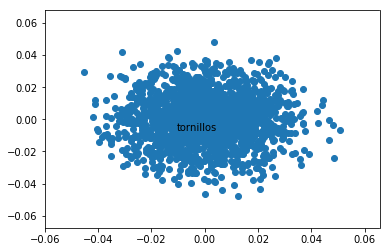

In [0]:
import matplotlib.pyplot as pyplot
%matplotlib inline 

pyplot.scatter(result[:, 0], result[:, 1])

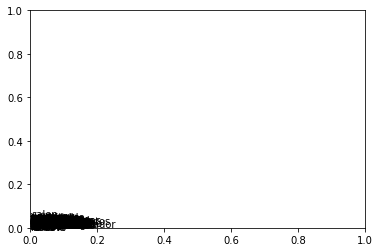

In [0]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [0]:
tweet_doc = nlp('Aqui son los hombres muy fuerte and guapo')
print(tweet_doc.vector)

[ 1.23499918e+00  1.28977969e-02  1.92433977e+00 -1.73723960e+00
  2.08076382e+00  4.94986624e-01  2.32711291e+00  7.86435604e-01
 -5.28977573e-01  1.72465229e+00 -1.95188046e+00  2.75788337e-01
 -3.00354218e+00 -3.66924381e+00  7.71069765e-01  5.11602402e-01
 -3.44344705e-01  3.77566904e-01 -1.28533983e+00  3.15844953e-01
  8.60305905e-01  9.60476995e-02  7.42251217e-01  1.13527608e+00
  1.92557490e+00 -2.18756294e+00 -3.06069827e+00  1.50500560e+00
  1.01271212e-01 -3.34268808e-01 -9.39176738e-01 -1.48506212e+00
  2.02799916e+00  2.38325620e+00 -9.28774476e-02 -2.62090206e+00
 -1.50293037e-01 -3.22847068e-01  2.38829756e+00 -1.36833930e+00
 -2.99069977e+00 -1.66103339e+00  3.59520197e+00 -1.05452919e+00
 -1.19668436e+00 -1.86461759e+00  2.01367712e+00 -1.67045426e+00
 -2.42408180e+00  7.17659295e-01 -6.59267545e-01  1.33636487e+00
 -4.01470333e-01  2.29383564e+00 -1.99000180e+00 -1.00545442e+00
  9.49966788e-01 -1.88207006e+00  3.44965816e-01 -2.70798659e+00
 -1.20150614e+00 -3.00642

## FastText examples

<b>Desired Output File Format</b>
<pre>
__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?
__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments
__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?
</pre>

In [0]:
file_aphor_labels = "/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorism-label.txt"
file_aphor_nolabels = "/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorism-nolabel.txt"

fh = open(file_aphor_labels, encoding='utf-8')
aphor_label_raw = fh.read()
fh.close
type(aphor_label_raw)
len(aphor_label_raw)
print(aphor_label_raw[1:500])


l que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello. [[personalidades, molestia, corpóreo, cabeza, humano, cine]]








El hipopótamo parece un buzón de alcance en espera de cartas. ¿Cartas para el África? ¿Car


In [0]:
import pandas as pd
import re
import string

# Integer weights given to tags words (0 = remove)
TAG_WT = 0
# If missing tags completely, this hold the sequential number of aphorism as linearly processed (neg = no missing tags)
tag_miss = -1

exclude_punct = set(string.punctuation)

In [0]:
aphor_wtags = [] # List of all tags associated with current aphorism
aphor_no = 0 # Current number of aphorism being processed

# FUTURE: to store in pandas df for greater functionality (e.g. graphing/EDA)
data = pd.DataFrame(columns = ['aphor', 'tags'])

def remove_dup_spaces(l):
  words = [w for w in l.split('\n') if w != '']
  return ' '.join(words)

def striplist(l):
    return([x.strip() for x in l])

# aphor_nolable_raw

# Process labelled aphorisms

aphor_tags_str = aphor_label_raw.split("]]") # Split each line into 'aphorism' and 'tags'

aphor_both = []
line_no = 0

for line in aphor_tags_str:
    line_no += 1
    line_both = line.split("[[")
    aphor = line_both[0].strip()
    try:
        line_both[1]
        tags = line_both[1].strip()
    except IndexError:
        tags = ''
        
    aphor = remove_dup_spaces(aphor)
    
    # Process Aphorism string
    line_sp = "".join([re.sub(" +"," ",x) for x in line]) # Collapse spaces
    line_nl = "".join([re.sub("\n+","\n",x) for x in line_sp]) # Collapse new lines
    # print("LINE {}: ---{}---".format(line_no, aphor))
    # print("LINE {}: ---{}---".format(line_no, tags))
    
    # Old
    # aphor0 = remove_dup_spaces(new[0])
    # aphor1 = [''.join(ch for ch in w if ch not in exclude_punct) for w in aphor0.split(' ') if len(w) > 0]
  
    # Process tag string
    if len(tags) < 2:
        print("ERROR: no tags for aphorism #{}: text: {}".format(line_no, tags))
        tags = []
        aphor_both = aphor
    else:
        tags_ws = tags.split(",")
        # print(type(tags))
        tags = [tag_word.strip() for tag_word in tags_ws]
        for tag in tags:
            aphor = "__label__{} ".format(tag) + aphor
        # striplist(tags)
        
    # aphor_both = aphor + (str(tags))
    
    # Add each processed line to the cumulative list of aphorisms with tags
    if (len(aphor) > 1):
        aphor_wtags.append(aphor)

print(len(aphor_wtags))

ERROR: no tags for aphorism #1720: text: 
1719


In [0]:
aphor_wtags[0]

'__label__cine __label__humano __label__cabeza __label__corpóreo __label__molestia __label__personalidades El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.'

In [0]:
aphor_wtags[1718]

"La casa de té está llena de los yes que estornudan los ingleses.['negocios', 'casas-de-té', 'anglicismo', 'gerundios', 'estereotipos']"

In [0]:
file_aphor_train = "/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms-train.txt"

with open(file_aphor_train, 'w') as f:
    for line in aphor_wtags:
        f.write("%s\n" % line)



In [0]:
!head -n 5 aphorism-train.txt

__label__cine __label__humano __label__cabeza __label__corpóreo __label__molestia __label__personalidades El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.
__label__geografía __label__epístola __label__buzón __label__objetos __label__comparaciones __label__animales __label__naturaleza El hipopótamo parece un buzón de alcance en espera de cartas. ¿Cartas para el África? ¿Cartas para la región de los Lagos Centrales? Arca postal para en medio de los desiertos caliginosos hubiéramos arrojado en su boquete una misiva cualquiera si tuviésemos amigos en aquéllas regiones inhóspitas. ¡Con qué hambre de cartas nos abre su boca en los parques zoológicos!
__label__extranjerismos __label__cocina __label__desafi